# Gradiente descendiente

## Función objetivo: Esfera

Para dos variables: 


$$
f(x,y) = x^2 + y^2
$$

Para $n$ variables:

$$
f(\textbf{x}) = \sum_{i=1}^n x_i^2
$$

* Mínimo global:

$$
f(x_i,\dots,x_n) = (0,\dots,0) = 0
$$

* Espacio de búsqueda:

$$
\infty \leq x_i \leq \infty, 1 \leq i \leq n
$$


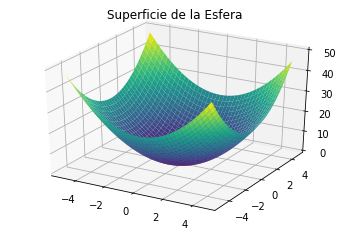

In [1]:
# Graficamos la superficie de la función
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Generamos valores para Y y X.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la Esfera');

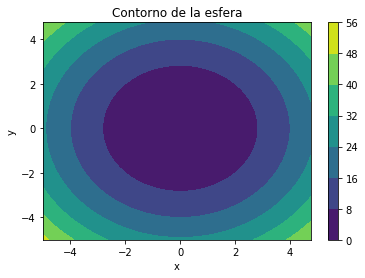

In [2]:
# Graficamos la gráfica de contorno de la función de la esfera 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Contorno de la esfera')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Gradiente de la función

Recordemos que el gradiente de una función multivariada se define cómo:

$$
\nabla f(\textbf{x})=  \begin{bmatrix}
\frac{\partial f(\textbf{x})}{\partial x_1},\frac{\partial f(\textbf{x})}{\partial x_2},\dots,\frac{\partial f(\textbf{x})}{\partial x_n}
\end{bmatrix}
$$

Para nuestra función objetivo de la esfera, las derivadas parciales son

$$
\frac{\partial f(x,y)}{\partial x} = 2x
$$

$$
\frac{\partial f(x,y)}{\partial y} = 2y
$$

El gradiente es

$$
\nabla f(x,y) = \begin{bmatrix}2x & 2y\end{bmatrix}
$$

In [3]:
# Definimos la función de la esfera
def esfera(X):
    x,y = X
    return x**2 + y**2

# Definimos el gradiente de la función
def gradiente_esfera(X):
    dx = 2*X[0]
    dy = 2*X[1]
    return np.array([dx,dy])

## Algoritmo de descenso del gradiente

In [4]:
def descenso_gradiente(f,g,ε,α_init,c,ρ,xk,xk_anterior):
    it = 0
    while abs(f(xk) - f(xk_anterior)) > ε:
        print("Iteración {}".format(it))
        pk = -1*g(xk)
        # Calculamos tamaño de paso
        α = α_init
        while f(xk + α*pk) < f(xk) + c*ρ*sum(g(xk)*pk):
            α = ρ * α
    
        xk_anterior = xk
        xk = xk + α*pk
        it += 1
    return xk

In [5]:
# Definimos los parámetros iniciales
ε = 0.0000001
α_init = 0.2
c = 0.5
ρ = 0.5

xk = np.array([2,2])
xk_anterior  = np.array([0,0])

descenso_gradiente(esfera,gradiente_esfera,ε,α_init,c,ρ,xk,xk_anterior)

Iteración 0
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18


array([0.00012187, 0.00012187])

## Función objetivo: Ackley

$$
f(x,y) = -20 *\exp [-0.2 \sqrt{0.5(x^2 + y^2)}] - \exp[0.5(\cos 2\pi x) + \cos 2\pi y)] + e + 20
$$

* Mínimo global:

$$
f(0,0) = 0
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$

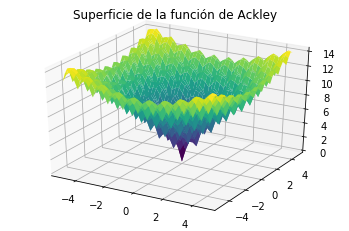

In [6]:
# Generamos valores para Y y X.
from math import e,pi

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = -20*e**(-0.2*(0.5*(X**2+Y**2))**(1/2) ) -e**(0.5*(np.cos(2*pi*X)+np.cos(2*pi*Y)))+e+20


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función de Ackley');

 


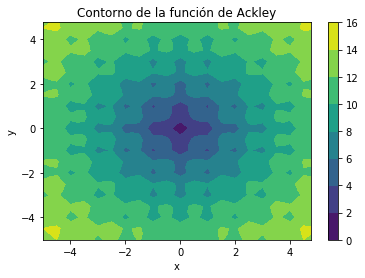

In [7]:
# Graficamos la gráfica de contorno de la función de la esfera 

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Contorno de la función de Ackley')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [8]:
# pip install numdifftools
import numdifftools as nd

def ackley(X):
    return -20*e**(-0.2*(0.5*(X[0]**2+X[1]**2))**(1/2) ) -e**(0.5*(np.cos(2*pi*X[0])+np.cos(2*pi*X[1])))+e+20

def gradiente_ackley(X):
    return nd.Gradient(ackley)(X)


In [9]:
# Definimos los parámetros iniciales
ε_ack = 0.0001
α_init_ack = 0.2
c_ack = 0.5
ρ_ack = 0.5

xk_ack = np.array([4,4])
xk_anterior_ack  = np.array([0,0])

descenso_gradiente(ackley,gradiente_ackley,ε_ack,α_init_ack,c_ack,ρ_ack,xk_ack,xk_anterior_ack)

Iteración 0
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Iteración 24
Iteración 25
Iteración 26
Iteración 27
Iteración 28
Iteración 29
Iteración 30
Iteración 31
Iteración 32
Iteración 33
Iteración 34
Iteración 35
Iteración 36
Iteración 37
Iteración 38
Iteración 39
Iteración 40
Iteración 41
Iteración 42
Iteración 43
Iteración 44
Iteración 45
Iteración 46
Iteración 47
Iteración 48
Iteración 49
Iteración 50
Iteración 51
Iteración 52
Iteración 53
Iteración 54
Iteración 55
Iteración 56
Iteración 57
Iteración 58
Iteración 59
Iteración 60
Iteración 61
Iteración 62
Iteración 63
Iteración 64
Iteración 65
Iteración 66
Iteración 67
Iteración 68
Iteración 69
Iteración 70
Iteración 71
Iteración 72
Iteración 73
Iteración 74
Iteración 75
Iteración 76
Iteración

Iteración 604
Iteración 605
Iteración 606
Iteración 607
Iteración 608
Iteración 609
Iteración 610
Iteración 611
Iteración 612
Iteración 613
Iteración 614
Iteración 615
Iteración 616
Iteración 617
Iteración 618
Iteración 619
Iteración 620
Iteración 621
Iteración 622
Iteración 623
Iteración 624
Iteración 625
Iteración 626
Iteración 627
Iteración 628
Iteración 629
Iteración 630
Iteración 631
Iteración 632
Iteración 633
Iteración 634
Iteración 635
Iteración 636
Iteración 637
Iteración 638
Iteración 639
Iteración 640
Iteración 641
Iteración 642
Iteración 643
Iteración 644
Iteración 645
Iteración 646
Iteración 647
Iteración 648
Iteración 649
Iteración 650
Iteración 651
Iteración 652
Iteración 653
Iteración 654
Iteración 655
Iteración 656
Iteración 657
Iteración 658
Iteración 659
Iteración 660
Iteración 661
Iteración 662
Iteración 663
Iteración 664
Iteración 665
Iteración 666
Iteración 667
Iteración 668
Iteración 669
Iteración 670
Iteración 671
Iteración 672
Iteración 673
Iteración 674
Iterac

Iteración 1201
Iteración 1202
Iteración 1203
Iteración 1204
Iteración 1205
Iteración 1206
Iteración 1207
Iteración 1208
Iteración 1209
Iteración 1210
Iteración 1211
Iteración 1212
Iteración 1213
Iteración 1214
Iteración 1215
Iteración 1216
Iteración 1217
Iteración 1218
Iteración 1219
Iteración 1220
Iteración 1221
Iteración 1222
Iteración 1223
Iteración 1224
Iteración 1225
Iteración 1226
Iteración 1227
Iteración 1228
Iteración 1229
Iteración 1230
Iteración 1231
Iteración 1232
Iteración 1233
Iteración 1234
Iteración 1235
Iteración 1236
Iteración 1237
Iteración 1238
Iteración 1239
Iteración 1240
Iteración 1241
Iteración 1242
Iteración 1243
Iteración 1244
Iteración 1245
Iteración 1246
Iteración 1247
Iteración 1248
Iteración 1249
Iteración 1250
Iteración 1251
Iteración 1252
Iteración 1253
Iteración 1254
Iteración 1255
Iteración 1256
Iteración 1257
Iteración 1258
Iteración 1259
Iteración 1260
Iteración 1261
Iteración 1262
Iteración 1263
Iteración 1264
Iteración 1265
Iteración 1266
Iteración 

Iteración 1767
Iteración 1768
Iteración 1769
Iteración 1770
Iteración 1771
Iteración 1772
Iteración 1773
Iteración 1774
Iteración 1775
Iteración 1776
Iteración 1777
Iteración 1778
Iteración 1779
Iteración 1780
Iteración 1781
Iteración 1782
Iteración 1783
Iteración 1784
Iteración 1785
Iteración 1786
Iteración 1787
Iteración 1788
Iteración 1789
Iteración 1790
Iteración 1791
Iteración 1792
Iteración 1793
Iteración 1794
Iteración 1795
Iteración 1796
Iteración 1797
Iteración 1798
Iteración 1799
Iteración 1800
Iteración 1801
Iteración 1802
Iteración 1803
Iteración 1804
Iteración 1805
Iteración 1806
Iteración 1807
Iteración 1808
Iteración 1809
Iteración 1810
Iteración 1811
Iteración 1812
Iteración 1813
Iteración 1814
Iteración 1815
Iteración 1816
Iteración 1817
Iteración 1818
Iteración 1819
Iteración 1820
Iteración 1821
Iteración 1822
Iteración 1823
Iteración 1824
Iteración 1825
Iteración 1826
Iteración 1827
Iteración 1828
Iteración 1829
Iteración 1830
Iteración 1831
Iteración 1832
Iteración 

Iteración 2339
Iteración 2340
Iteración 2341
Iteración 2342
Iteración 2343
Iteración 2344
Iteración 2345
Iteración 2346
Iteración 2347
Iteración 2348
Iteración 2349
Iteración 2350
Iteración 2351
Iteración 2352
Iteración 2353
Iteración 2354
Iteración 2355
Iteración 2356
Iteración 2357
Iteración 2358
Iteración 2359
Iteración 2360
Iteración 2361
Iteración 2362
Iteración 2363
Iteración 2364
Iteración 2365
Iteración 2366
Iteración 2367
Iteración 2368
Iteración 2369
Iteración 2370
Iteración 2371
Iteración 2372
Iteración 2373
Iteración 2374
Iteración 2375
Iteración 2376
Iteración 2377
Iteración 2378
Iteración 2379
Iteración 2380
Iteración 2381
Iteración 2382
Iteración 2383
Iteración 2384
Iteración 2385
Iteración 2386
Iteración 2387
Iteración 2388
Iteración 2389
Iteración 2390
Iteración 2391
Iteración 2392
Iteración 2393
Iteración 2394
Iteración 2395
Iteración 2396
Iteración 2397
Iteración 2398
Iteración 2399
Iteración 2400
Iteración 2401
Iteración 2402
Iteración 2403
Iteración 2404
Iteración 

Iteración 2893
Iteración 2894
Iteración 2895


array([-0.670484, -0.670484])

## Función objetivo: Rosenbrock

$$
f(x,y) = (a-x)^2 + b(y - x^2)^2
$$

* Mínimo global:

$$
f(x,y)=(a,a^2)=0
$$

Usualmente se toma $a=1$ y $b=100$.

* Espacio de búsqueda:

$$
\infty \leq x_i \leq \infty, 1 \leq i \leq n
$$

* Gradiente:

$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
2(x-a) -4bx(y-x^2) \\
2b(y-x^2)
\end{bmatrix} 
$$

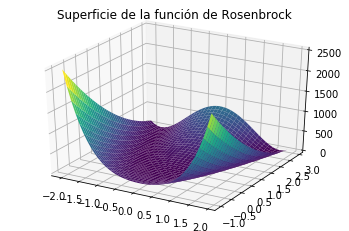

In [10]:
# Generamos valores para Y y X.
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (1-X)**2 + 100*(Y-X**2)**2


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función de Rosenbrock');

 

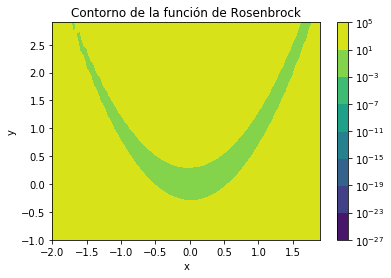

In [11]:
# Graficamos la gráfica de contorno de la función de la esfera 
import matplotlib.ticker as ticker


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z,locator=ticker.LogLocator())
fig.colorbar(cp)
ax.set_title('Contorno de la función de Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [12]:
# Modificamos la función objetivo para que acepte vectores
def rosenbrock(X):
    return (1-X[0])**2 + 100*(X[1]-X[0]**2)**2

def gradiente_rosenbrock(X):
    dx = 2*(X[0]-1) - 4*100*X[0]*(X[1]-X[0]**2)
    dy = 2*100*(X[1]-X[0]**2)
    return np.array([dx,dy])

In [13]:
# Definimos los parámetros iniciales
ε_ros = 0.00000001
α_init_ros = 0.00002
c_ros = 0.5
ρ_ros = 0.5

xk_ros = np.array([0.2,0.2])
xk_anterior_ros  = np.array([0,0])

descenso_gradiente(rosenbrock,gradiente_rosenbrock,ε_ros,α_init_ros,c_ros,ρ_ros,xk_ros,xk_anterior_ros)

Iteración 0
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Iteración 24
Iteración 25
Iteración 26
Iteración 27
Iteración 28
Iteración 29
Iteración 30
Iteración 31
Iteración 32
Iteración 33
Iteración 34
Iteración 35
Iteración 36
Iteración 37
Iteración 38
Iteración 39
Iteración 40
Iteración 41
Iteración 42
Iteración 43
Iteración 44
Iteración 45
Iteración 46
Iteración 47
Iteración 48
Iteración 49
Iteración 50
Iteración 51
Iteración 52
Iteración 53
Iteración 54
Iteración 55
Iteración 56
Iteración 57
Iteración 58
Iteración 59
Iteración 60
Iteración 61
Iteración 62
Iteración 63
Iteración 64
Iteración 65
Iteración 66
Iteración 67
Iteración 68
Iteración 69
Iteración 70
Iteración 71
Iteración 72
Iteración 73
Iteración 74
Iteración 75
Iteración 76
Iteración

Iteración 2185
Iteración 2186
Iteración 2187
Iteración 2188
Iteración 2189
Iteración 2190
Iteración 2191
Iteración 2192
Iteración 2193
Iteración 2194
Iteración 2195
Iteración 2196
Iteración 2197
Iteración 2198
Iteración 2199
Iteración 2200
Iteración 2201
Iteración 2202
Iteración 2203
Iteración 2204
Iteración 2205
Iteración 2206
Iteración 2207
Iteración 2208
Iteración 2209
Iteración 2210
Iteración 2211
Iteración 2212
Iteración 2213
Iteración 2214
Iteración 2215
Iteración 2216
Iteración 2217
Iteración 2218
Iteración 2219
Iteración 2220
Iteración 2221
Iteración 2222
Iteración 2223
Iteración 2224
Iteración 2225
Iteración 2226
Iteración 2227
Iteración 2228
Iteración 2229
Iteración 2230
Iteración 2231
Iteración 2232
Iteración 2233
Iteración 2234
Iteración 2235
Iteración 2236
Iteración 2237
Iteración 2238
Iteración 2239
Iteración 2240
Iteración 2241
Iteración 2242
Iteración 2243
Iteración 2244
Iteración 2245
Iteración 2246
Iteración 2247
Iteración 2248
Iteración 2249
Iteración 2250
Iteración 

Iteración 4730
Iteración 4731
Iteración 4732
Iteración 4733
Iteración 4734
Iteración 4735
Iteración 4736
Iteración 4737
Iteración 4738
Iteración 4739
Iteración 4740
Iteración 4741
Iteración 4742
Iteración 4743
Iteración 4744
Iteración 4745
Iteración 4746
Iteración 4747
Iteración 4748
Iteración 4749
Iteración 4750
Iteración 4751
Iteración 4752
Iteración 4753
Iteración 4754
Iteración 4755
Iteración 4756
Iteración 4757
Iteración 4758
Iteración 4759
Iteración 4760
Iteración 4761
Iteración 4762
Iteración 4763
Iteración 4764
Iteración 4765
Iteración 4766
Iteración 4767
Iteración 4768
Iteración 4769
Iteración 4770
Iteración 4771
Iteración 4772
Iteración 4773
Iteración 4774
Iteración 4775
Iteración 4776
Iteración 4777
Iteración 4778
Iteración 4779
Iteración 4780
Iteración 4781
Iteración 4782
Iteración 4783
Iteración 4784
Iteración 4785
Iteración 4786
Iteración 4787
Iteración 4788
Iteración 4789
Iteración 4790
Iteración 4791
Iteración 4792
Iteración 4793
Iteración 4794
Iteración 4795
Iteración 

Iteración 7299
Iteración 7300
Iteración 7301
Iteración 7302
Iteración 7303
Iteración 7304
Iteración 7305
Iteración 7306
Iteración 7307
Iteración 7308
Iteración 7309
Iteración 7310
Iteración 7311
Iteración 7312
Iteración 7313
Iteración 7314
Iteración 7315
Iteración 7316
Iteración 7317
Iteración 7318
Iteración 7319
Iteración 7320
Iteración 7321
Iteración 7322
Iteración 7323
Iteración 7324
Iteración 7325
Iteración 7326
Iteración 7327
Iteración 7328
Iteración 7329
Iteración 7330
Iteración 7331
Iteración 7332
Iteración 7333
Iteración 7334
Iteración 7335
Iteración 7336
Iteración 7337
Iteración 7338
Iteración 7339
Iteración 7340
Iteración 7341
Iteración 7342
Iteración 7343
Iteración 7344
Iteración 7345
Iteración 7346
Iteración 7347
Iteración 7348
Iteración 7349
Iteración 7350
Iteración 7351
Iteración 7352
Iteración 7353
Iteración 7354
Iteración 7355
Iteración 7356
Iteración 7357
Iteración 7358
Iteración 7359
Iteración 7360
Iteración 7361
Iteración 7362
Iteración 7363
Iteración 7364
Iteración 

Iteración 9674
Iteración 9675
Iteración 9676
Iteración 9677
Iteración 9678
Iteración 9679
Iteración 9680
Iteración 9681
Iteración 9682
Iteración 9683
Iteración 9684
Iteración 9685
Iteración 9686
Iteración 9687
Iteración 9688
Iteración 9689
Iteración 9690
Iteración 9691
Iteración 9692
Iteración 9693
Iteración 9694
Iteración 9695
Iteración 9696
Iteración 9697
Iteración 9698
Iteración 9699
Iteración 9700
Iteración 9701
Iteración 9702
Iteración 9703
Iteración 9704
Iteración 9705
Iteración 9706
Iteración 9707
Iteración 9708
Iteración 9709
Iteración 9710
Iteración 9711
Iteración 9712
Iteración 9713
Iteración 9714
Iteración 9715
Iteración 9716
Iteración 9717
Iteración 9718
Iteración 9719
Iteración 9720
Iteración 9721
Iteración 9722
Iteración 9723
Iteración 9724
Iteración 9725
Iteración 9726
Iteración 9727
Iteración 9728
Iteración 9729
Iteración 9730
Iteración 9731
Iteración 9732
Iteración 9733
Iteración 9734
Iteración 9735
Iteración 9736
Iteración 9737
Iteración 9738
Iteración 9739
Iteración 

Iteración 12102
Iteración 12103
Iteración 12104
Iteración 12105
Iteración 12106
Iteración 12107
Iteración 12108
Iteración 12109
Iteración 12110
Iteración 12111
Iteración 12112
Iteración 12113
Iteración 12114
Iteración 12115
Iteración 12116
Iteración 12117
Iteración 12118
Iteración 12119
Iteración 12120
Iteración 12121
Iteración 12122
Iteración 12123
Iteración 12124
Iteración 12125
Iteración 12126
Iteración 12127
Iteración 12128
Iteración 12129
Iteración 12130
Iteración 12131
Iteración 12132
Iteración 12133
Iteración 12134
Iteración 12135
Iteración 12136
Iteración 12137
Iteración 12138
Iteración 12139
Iteración 12140
Iteración 12141
Iteración 12142
Iteración 12143
Iteración 12144
Iteración 12145
Iteración 12146
Iteración 12147
Iteración 12148
Iteración 12149
Iteración 12150
Iteración 12151
Iteración 12152
Iteración 12153
Iteración 12154
Iteración 12155
Iteración 12156
Iteración 12157
Iteración 12158
Iteración 12159
Iteración 12160
Iteración 12161
Iteración 12162
Iteración 12163
Iteració

Iteración 14526
Iteración 14527
Iteración 14528
Iteración 14529
Iteración 14530
Iteración 14531
Iteración 14532
Iteración 14533
Iteración 14534
Iteración 14535
Iteración 14536
Iteración 14537
Iteración 14538
Iteración 14539
Iteración 14540
Iteración 14541
Iteración 14542
Iteración 14543
Iteración 14544
Iteración 14545
Iteración 14546
Iteración 14547
Iteración 14548
Iteración 14549
Iteración 14550
Iteración 14551
Iteración 14552
Iteración 14553
Iteración 14554
Iteración 14555
Iteración 14556
Iteración 14557
Iteración 14558
Iteración 14559
Iteración 14560
Iteración 14561
Iteración 14562
Iteración 14563
Iteración 14564
Iteración 14565
Iteración 14566
Iteración 14567
Iteración 14568
Iteración 14569
Iteración 14570
Iteración 14571
Iteración 14572
Iteración 14573
Iteración 14574
Iteración 14575
Iteración 14576
Iteración 14577
Iteración 14578
Iteración 14579
Iteración 14580
Iteración 14581
Iteración 14582
Iteración 14583
Iteración 14584
Iteración 14585
Iteración 14586
Iteración 14587
Iteració

Iteración 16986
Iteración 16987
Iteración 16988
Iteración 16989
Iteración 16990
Iteración 16991
Iteración 16992
Iteración 16993
Iteración 16994
Iteración 16995
Iteración 16996
Iteración 16997
Iteración 16998
Iteración 16999
Iteración 17000
Iteración 17001
Iteración 17002
Iteración 17003
Iteración 17004
Iteración 17005
Iteración 17006
Iteración 17007
Iteración 17008
Iteración 17009
Iteración 17010
Iteración 17011
Iteración 17012
Iteración 17013
Iteración 17014
Iteración 17015
Iteración 17016
Iteración 17017
Iteración 17018
Iteración 17019
Iteración 17020
Iteración 17021
Iteración 17022
Iteración 17023
Iteración 17024
Iteración 17025
Iteración 17026
Iteración 17027
Iteración 17028
Iteración 17029
Iteración 17030
Iteración 17031
Iteración 17032
Iteración 17033
Iteración 17034
Iteración 17035
Iteración 17036
Iteración 17037
Iteración 17038
Iteración 17039
Iteración 17040
Iteración 17041
Iteración 17042
Iteración 17043
Iteración 17044
Iteración 17045
Iteración 17046
Iteración 17047
Iteració

Iteración 19627
Iteración 19628
Iteración 19629
Iteración 19630
Iteración 19631
Iteración 19632
Iteración 19633
Iteración 19634
Iteración 19635
Iteración 19636
Iteración 19637
Iteración 19638
Iteración 19639
Iteración 19640
Iteración 19641
Iteración 19642
Iteración 19643
Iteración 19644
Iteración 19645
Iteración 19646
Iteración 19647
Iteración 19648
Iteración 19649
Iteración 19650
Iteración 19651
Iteración 19652
Iteración 19653
Iteración 19654
Iteración 19655
Iteración 19656
Iteración 19657
Iteración 19658
Iteración 19659
Iteración 19660
Iteración 19661
Iteración 19662
Iteración 19663
Iteración 19664
Iteración 19665
Iteración 19666
Iteración 19667
Iteración 19668
Iteración 19669
Iteración 19670
Iteración 19671
Iteración 19672
Iteración 19673
Iteración 19674
Iteración 19675
Iteración 19676
Iteración 19677
Iteración 19678
Iteración 19679
Iteración 19680
Iteración 19681
Iteración 19682
Iteración 19683
Iteración 19684
Iteración 19685
Iteración 19686
Iteración 19687
Iteración 19688
Iteració

Iteración 21919
Iteración 21920
Iteración 21921
Iteración 21922
Iteración 21923
Iteración 21924
Iteración 21925
Iteración 21926
Iteración 21927
Iteración 21928
Iteración 21929
Iteración 21930
Iteración 21931
Iteración 21932
Iteración 21933
Iteración 21934
Iteración 21935
Iteración 21936
Iteración 21937
Iteración 21938
Iteración 21939
Iteración 21940
Iteración 21941
Iteración 21942
Iteración 21943
Iteración 21944
Iteración 21945
Iteración 21946
Iteración 21947
Iteración 21948
Iteración 21949
Iteración 21950
Iteración 21951
Iteración 21952
Iteración 21953
Iteración 21954
Iteración 21955
Iteración 21956
Iteración 21957
Iteración 21958
Iteración 21959
Iteración 21960
Iteración 21961
Iteración 21962
Iteración 21963
Iteración 21964
Iteración 21965
Iteración 21966
Iteración 21967
Iteración 21968
Iteración 21969
Iteración 21970
Iteración 21971
Iteración 21972
Iteración 21973
Iteración 21974
Iteración 21975
Iteración 21976
Iteración 21977
Iteración 21978
Iteración 21979
Iteración 21980
Iteració

Iteración 24221
Iteración 24222
Iteración 24223
Iteración 24224
Iteración 24225
Iteración 24226
Iteración 24227
Iteración 24228
Iteración 24229
Iteración 24230
Iteración 24231
Iteración 24232
Iteración 24233
Iteración 24234
Iteración 24235
Iteración 24236
Iteración 24237
Iteración 24238
Iteración 24239
Iteración 24240
Iteración 24241
Iteración 24242
Iteración 24243
Iteración 24244
Iteración 24245
Iteración 24246
Iteración 24247
Iteración 24248
Iteración 24249
Iteración 24250
Iteración 24251
Iteración 24252
Iteración 24253
Iteración 24254
Iteración 24255
Iteración 24256
Iteración 24257
Iteración 24258
Iteración 24259
Iteración 24260
Iteración 24261
Iteración 24262
Iteración 24263
Iteración 24264
Iteración 24265
Iteración 24266
Iteración 24267
Iteración 24268
Iteración 24269
Iteración 24270
Iteración 24271
Iteración 24272
Iteración 24273
Iteración 24274
Iteración 24275
Iteración 24276
Iteración 24277
Iteración 24278
Iteración 24279
Iteración 24280
Iteración 24281
Iteración 24282
Iteració

Iteración 26724
Iteración 26725
Iteración 26726
Iteración 26727
Iteración 26728
Iteración 26729
Iteración 26730
Iteración 26731
Iteración 26732
Iteración 26733
Iteración 26734
Iteración 26735
Iteración 26736
Iteración 26737
Iteración 26738
Iteración 26739
Iteración 26740
Iteración 26741
Iteración 26742
Iteración 26743
Iteración 26744
Iteración 26745
Iteración 26746
Iteración 26747
Iteración 26748
Iteración 26749
Iteración 26750
Iteración 26751
Iteración 26752
Iteración 26753
Iteración 26754
Iteración 26755
Iteración 26756
Iteración 26757
Iteración 26758
Iteración 26759
Iteración 26760
Iteración 26761
Iteración 26762
Iteración 26763
Iteración 26764
Iteración 26765
Iteración 26766
Iteración 26767
Iteración 26768
Iteración 26769
Iteración 26770
Iteración 26771
Iteración 26772
Iteración 26773
Iteración 26774
Iteración 26775
Iteración 26776
Iteración 26777
Iteración 26778
Iteración 26779
Iteración 26780
Iteración 26781
Iteración 26782
Iteración 26783
Iteración 26784
Iteración 26785
Iteració

Iteración 29142
Iteración 29143
Iteración 29144
Iteración 29145
Iteración 29146
Iteración 29147
Iteración 29148
Iteración 29149
Iteración 29150
Iteración 29151
Iteración 29152
Iteración 29153
Iteración 29154
Iteración 29155
Iteración 29156
Iteración 29157
Iteración 29158
Iteración 29159
Iteración 29160
Iteración 29161
Iteración 29162
Iteración 29163
Iteración 29164
Iteración 29165
Iteración 29166
Iteración 29167
Iteración 29168
Iteración 29169
Iteración 29170
Iteración 29171
Iteración 29172
Iteración 29173
Iteración 29174
Iteración 29175
Iteración 29176
Iteración 29177
Iteración 29178
Iteración 29179
Iteración 29180
Iteración 29181
Iteración 29182
Iteración 29183
Iteración 29184
Iteración 29185
Iteración 29186
Iteración 29187
Iteración 29188
Iteración 29189
Iteración 29190
Iteración 29191
Iteración 29192
Iteración 29193
Iteración 29194
Iteración 29195
Iteración 29196
Iteración 29197
Iteración 29198
Iteración 29199
Iteración 29200
Iteración 29201
Iteración 29202
Iteración 29203
Iteració

Iteración 31339
Iteración 31340
Iteración 31341
Iteración 31342
Iteración 31343
Iteración 31344
Iteración 31345
Iteración 31346
Iteración 31347
Iteración 31348
Iteración 31349
Iteración 31350
Iteración 31351
Iteración 31352
Iteración 31353
Iteración 31354
Iteración 31355
Iteración 31356
Iteración 31357
Iteración 31358
Iteración 31359
Iteración 31360
Iteración 31361
Iteración 31362
Iteración 31363
Iteración 31364
Iteración 31365
Iteración 31366
Iteración 31367
Iteración 31368
Iteración 31369
Iteración 31370
Iteración 31371
Iteración 31372
Iteración 31373
Iteración 31374
Iteración 31375
Iteración 31376
Iteración 31377
Iteración 31378
Iteración 31379
Iteración 31380
Iteración 31381
Iteración 31382
Iteración 31383
Iteración 31384
Iteración 31385
Iteración 31386
Iteración 31387
Iteración 31388
Iteración 31389
Iteración 31390
Iteración 31391
Iteración 31392
Iteración 31393
Iteración 31394
Iteración 31395
Iteración 31396
Iteración 31397
Iteración 31398
Iteración 31399
Iteración 31400
Iteració

Iteración 33945
Iteración 33946
Iteración 33947
Iteración 33948
Iteración 33949
Iteración 33950
Iteración 33951
Iteración 33952
Iteración 33953
Iteración 33954
Iteración 33955
Iteración 33956
Iteración 33957
Iteración 33958
Iteración 33959
Iteración 33960
Iteración 33961
Iteración 33962
Iteración 33963
Iteración 33964
Iteración 33965
Iteración 33966
Iteración 33967
Iteración 33968
Iteración 33969
Iteración 33970
Iteración 33971
Iteración 33972
Iteración 33973
Iteración 33974
Iteración 33975
Iteración 33976
Iteración 33977
Iteración 33978
Iteración 33979
Iteración 33980
Iteración 33981
Iteración 33982
Iteración 33983
Iteración 33984
Iteración 33985
Iteración 33986
Iteración 33987
Iteración 33988
Iteración 33989
Iteración 33990
Iteración 33991
Iteración 33992
Iteración 33993
Iteración 33994
Iteración 33995
Iteración 33996
Iteración 33997
Iteración 33998
Iteración 33999
Iteración 34000
Iteración 34001
Iteración 34002
Iteración 34003
Iteración 34004
Iteración 34005
Iteración 34006
Iteració

Iteración 35820
Iteración 35821
Iteración 35822
Iteración 35823
Iteración 35824
Iteración 35825
Iteración 35826
Iteración 35827
Iteración 35828
Iteración 35829
Iteración 35830
Iteración 35831
Iteración 35832
Iteración 35833
Iteración 35834
Iteración 35835
Iteración 35836
Iteración 35837
Iteración 35838
Iteración 35839
Iteración 35840
Iteración 35841
Iteración 35842
Iteración 35843
Iteración 35844
Iteración 35845
Iteración 35846
Iteración 35847
Iteración 35848
Iteración 35849
Iteración 35850
Iteración 35851
Iteración 35852
Iteración 35853
Iteración 35854
Iteración 35855
Iteración 35856
Iteración 35857
Iteración 35858
Iteración 35859
Iteración 35860
Iteración 35861
Iteración 35862
Iteración 35863
Iteración 35864
Iteración 35865
Iteración 35866
Iteración 35867
Iteración 35868
Iteración 35869
Iteración 35870
Iteración 35871
Iteración 35872
Iteración 35873
Iteración 35874
Iteración 35875
Iteración 35876
Iteración 35877
Iteración 35878
Iteración 35879
Iteración 35880
Iteración 35881
Iteració

Iteración 37520
Iteración 37521
Iteración 37522
Iteración 37523
Iteración 37524
Iteración 37525
Iteración 37526
Iteración 37527
Iteración 37528
Iteración 37529
Iteración 37530
Iteración 37531
Iteración 37532
Iteración 37533
Iteración 37534
Iteración 37535
Iteración 37536
Iteración 37537
Iteración 37538
Iteración 37539
Iteración 37540
Iteración 37541
Iteración 37542
Iteración 37543
Iteración 37544
Iteración 37545
Iteración 37546
Iteración 37547
Iteración 37548
Iteración 37549
Iteración 37550
Iteración 37551
Iteración 37552
Iteración 37553
Iteración 37554
Iteración 37555
Iteración 37556
Iteración 37557
Iteración 37558
Iteración 37559
Iteración 37560
Iteración 37561
Iteración 37562
Iteración 37563
Iteración 37564
Iteración 37565
Iteración 37566
Iteración 37567
Iteración 37568
Iteración 37569
Iteración 37570
Iteración 37571
Iteración 37572
Iteración 37573
Iteración 37574
Iteración 37575
Iteración 37576
Iteración 37577
Iteración 37578
Iteración 37579
Iteración 37580
Iteración 37581
Iteració

Iteración 39799
Iteración 39800
Iteración 39801
Iteración 39802
Iteración 39803
Iteración 39804
Iteración 39805
Iteración 39806
Iteración 39807
Iteración 39808
Iteración 39809
Iteración 39810
Iteración 39811
Iteración 39812
Iteración 39813
Iteración 39814
Iteración 39815
Iteración 39816
Iteración 39817
Iteración 39818
Iteración 39819
Iteración 39820
Iteración 39821
Iteración 39822
Iteración 39823
Iteración 39824
Iteración 39825
Iteración 39826
Iteración 39827
Iteración 39828
Iteración 39829
Iteración 39830
Iteración 39831
Iteración 39832
Iteración 39833
Iteración 39834
Iteración 39835
Iteración 39836
Iteración 39837
Iteración 39838
Iteración 39839
Iteración 39840
Iteración 39841
Iteración 39842
Iteración 39843
Iteración 39844
Iteración 39845
Iteración 39846
Iteración 39847
Iteración 39848
Iteración 39849
Iteración 39850
Iteración 39851
Iteración 39852
Iteración 39853
Iteración 39854
Iteración 39855
Iteración 39856
Iteración 39857
Iteración 39858
Iteración 39859
Iteración 39860
Iteració

Iteración 42266
Iteración 42267
Iteración 42268
Iteración 42269
Iteración 42270
Iteración 42271
Iteración 42272
Iteración 42273
Iteración 42274
Iteración 42275
Iteración 42276
Iteración 42277
Iteración 42278
Iteración 42279
Iteración 42280
Iteración 42281
Iteración 42282
Iteración 42283
Iteración 42284
Iteración 42285
Iteración 42286
Iteración 42287
Iteración 42288
Iteración 42289
Iteración 42290
Iteración 42291
Iteración 42292
Iteración 42293
Iteración 42294
Iteración 42295
Iteración 42296
Iteración 42297
Iteración 42298
Iteración 42299
Iteración 42300
Iteración 42301
Iteración 42302
Iteración 42303
Iteración 42304
Iteración 42305
Iteración 42306
Iteración 42307
Iteración 42308
Iteración 42309
Iteración 42310
Iteración 42311
Iteración 42312
Iteración 42313
Iteración 42314
Iteración 42315
Iteración 42316
Iteración 42317
Iteración 42318
Iteración 42319
Iteración 42320
Iteración 42321
Iteración 42322
Iteración 42323
Iteración 42324
Iteración 42325
Iteración 42326
Iteración 42327
Iteració

Iteración 44763
Iteración 44764
Iteración 44765
Iteración 44766
Iteración 44767
Iteración 44768
Iteración 44769
Iteración 44770
Iteración 44771
Iteración 44772
Iteración 44773
Iteración 44774
Iteración 44775
Iteración 44776
Iteración 44777
Iteración 44778
Iteración 44779
Iteración 44780
Iteración 44781
Iteración 44782
Iteración 44783
Iteración 44784
Iteración 44785
Iteración 44786
Iteración 44787
Iteración 44788
Iteración 44789
Iteración 44790
Iteración 44791
Iteración 44792
Iteración 44793
Iteración 44794
Iteración 44795
Iteración 44796
Iteración 44797
Iteración 44798
Iteración 44799
Iteración 44800
Iteración 44801
Iteración 44802
Iteración 44803
Iteración 44804
Iteración 44805
Iteración 44806
Iteración 44807
Iteración 44808
Iteración 44809
Iteración 44810
Iteración 44811
Iteración 44812
Iteración 44813
Iteración 44814
Iteración 44815
Iteración 44816
Iteración 44817
Iteración 44818
Iteración 44819
Iteración 44820
Iteración 44821
Iteración 44822
Iteración 44823
Iteración 44824
Iteració

Iteración 47223
Iteración 47224
Iteración 47225
Iteración 47226
Iteración 47227
Iteración 47228
Iteración 47229
Iteración 47230
Iteración 47231
Iteración 47232
Iteración 47233
Iteración 47234
Iteración 47235
Iteración 47236
Iteración 47237
Iteración 47238
Iteración 47239
Iteración 47240
Iteración 47241
Iteración 47242
Iteración 47243
Iteración 47244
Iteración 47245
Iteración 47246
Iteración 47247
Iteración 47248
Iteración 47249
Iteración 47250
Iteración 47251
Iteración 47252
Iteración 47253
Iteración 47254
Iteración 47255
Iteración 47256
Iteración 47257
Iteración 47258
Iteración 47259
Iteración 47260
Iteración 47261
Iteración 47262
Iteración 47263
Iteración 47264
Iteración 47265
Iteración 47266
Iteración 47267
Iteración 47268
Iteración 47269
Iteración 47270
Iteración 47271
Iteración 47272
Iteración 47273
Iteración 47274
Iteración 47275
Iteración 47276
Iteración 47277
Iteración 47278
Iteración 47279
Iteración 47280
Iteración 47281
Iteración 47282
Iteración 47283
Iteración 47284
Iteració

Iteración 49596
Iteración 49597
Iteración 49598
Iteración 49599
Iteración 49600
Iteración 49601
Iteración 49602
Iteración 49603
Iteración 49604
Iteración 49605
Iteración 49606
Iteración 49607
Iteración 49608
Iteración 49609
Iteración 49610
Iteración 49611
Iteración 49612
Iteración 49613
Iteración 49614
Iteración 49615
Iteración 49616
Iteración 49617
Iteración 49618
Iteración 49619
Iteración 49620
Iteración 49621
Iteración 49622
Iteración 49623
Iteración 49624
Iteración 49625
Iteración 49626
Iteración 49627
Iteración 49628
Iteración 49629
Iteración 49630
Iteración 49631
Iteración 49632
Iteración 49633
Iteración 49634
Iteración 49635
Iteración 49636
Iteración 49637
Iteración 49638
Iteración 49639
Iteración 49640
Iteración 49641
Iteración 49642
Iteración 49643
Iteración 49644
Iteración 49645
Iteración 49646
Iteración 49647
Iteración 49648
Iteración 49649
Iteración 49650
Iteración 49651
Iteración 49652
Iteración 49653
Iteración 49654
Iteración 49655
Iteración 49656
Iteración 49657
Iteració

Iteración 52098
Iteración 52099
Iteración 52100
Iteración 52101
Iteración 52102
Iteración 52103
Iteración 52104
Iteración 52105
Iteración 52106
Iteración 52107
Iteración 52108
Iteración 52109
Iteración 52110
Iteración 52111
Iteración 52112
Iteración 52113
Iteración 52114
Iteración 52115
Iteración 52116
Iteración 52117
Iteración 52118
Iteración 52119
Iteración 52120
Iteración 52121
Iteración 52122
Iteración 52123
Iteración 52124
Iteración 52125
Iteración 52126
Iteración 52127
Iteración 52128
Iteración 52129
Iteración 52130
Iteración 52131
Iteración 52132
Iteración 52133
Iteración 52134
Iteración 52135
Iteración 52136
Iteración 52137
Iteración 52138
Iteración 52139
Iteración 52140
Iteración 52141
Iteración 52142
Iteración 52143
Iteración 52144
Iteración 52145
Iteración 52146
Iteración 52147
Iteración 52148
Iteración 52149
Iteración 52150
Iteración 52151
Iteración 52152
Iteración 52153
Iteración 52154
Iteración 52155
Iteración 52156
Iteración 52157
Iteración 52158
Iteración 52159
Iteració

Iteración 54629
Iteración 54630
Iteración 54631
Iteración 54632
Iteración 54633
Iteración 54634
Iteración 54635
Iteración 54636
Iteración 54637
Iteración 54638
Iteración 54639
Iteración 54640
Iteración 54641
Iteración 54642
Iteración 54643
Iteración 54644
Iteración 54645
Iteración 54646
Iteración 54647
Iteración 54648
Iteración 54649
Iteración 54650
Iteración 54651
Iteración 54652
Iteración 54653
Iteración 54654
Iteración 54655
Iteración 54656
Iteración 54657
Iteración 54658
Iteración 54659
Iteración 54660
Iteración 54661
Iteración 54662
Iteración 54663
Iteración 54664
Iteración 54665
Iteración 54666
Iteración 54667
Iteración 54668
Iteración 54669
Iteración 54670
Iteración 54671
Iteración 54672
Iteración 54673
Iteración 54674
Iteración 54675
Iteración 54676
Iteración 54677
Iteración 54678
Iteración 54679
Iteración 54680
Iteración 54681
Iteración 54682
Iteración 54683
Iteración 54684
Iteración 54685
Iteración 54686
Iteración 54687
Iteración 54688
Iteración 54689
Iteración 54690
Iteració

Iteración 57078
Iteración 57079
Iteración 57080
Iteración 57081
Iteración 57082
Iteración 57083
Iteración 57084
Iteración 57085
Iteración 57086
Iteración 57087
Iteración 57088
Iteración 57089
Iteración 57090
Iteración 57091
Iteración 57092
Iteración 57093
Iteración 57094
Iteración 57095
Iteración 57096
Iteración 57097
Iteración 57098
Iteración 57099
Iteración 57100
Iteración 57101
Iteración 57102
Iteración 57103
Iteración 57104
Iteración 57105
Iteración 57106
Iteración 57107
Iteración 57108
Iteración 57109
Iteración 57110
Iteración 57111
Iteración 57112
Iteración 57113
Iteración 57114
Iteración 57115
Iteración 57116
Iteración 57117
Iteración 57118
Iteración 57119
Iteración 57120
Iteración 57121
Iteración 57122
Iteración 57123
Iteración 57124
Iteración 57125
Iteración 57126
Iteración 57127
Iteración 57128
Iteración 57129
Iteración 57130
Iteración 57131
Iteración 57132
Iteración 57133
Iteración 57134
Iteración 57135
Iteración 57136
Iteración 57137
Iteración 57138
Iteración 57139
Iteració

Iteración 58869
Iteración 58870
Iteración 58871
Iteración 58872
Iteración 58873
Iteración 58874
Iteración 58875
Iteración 58876
Iteración 58877
Iteración 58878
Iteración 58879
Iteración 58880
Iteración 58881
Iteración 58882
Iteración 58883
Iteración 58884
Iteración 58885
Iteración 58886
Iteración 58887
Iteración 58888
Iteración 58889
Iteración 58890
Iteración 58891
Iteración 58892
Iteración 58893
Iteración 58894
Iteración 58895
Iteración 58896
Iteración 58897
Iteración 58898
Iteración 58899
Iteración 58900
Iteración 58901
Iteración 58902
Iteración 58903
Iteración 58904
Iteración 58905
Iteración 58906
Iteración 58907
Iteración 58908
Iteración 58909
Iteración 58910
Iteración 58911
Iteración 58912
Iteración 58913
Iteración 58914
Iteración 58915
Iteración 58916
Iteración 58917
Iteración 58918
Iteración 58919
Iteración 58920
Iteración 58921
Iteración 58922
Iteración 58923
Iteración 58924
Iteración 58925
Iteración 58926
Iteración 58927
Iteración 58928
Iteración 58929
Iteración 58930
Iteració

Iteración 60724
Iteración 60725
Iteración 60726
Iteración 60727
Iteración 60728
Iteración 60729
Iteración 60730
Iteración 60731
Iteración 60732
Iteración 60733
Iteración 60734
Iteración 60735
Iteración 60736
Iteración 60737
Iteración 60738
Iteración 60739
Iteración 60740
Iteración 60741
Iteración 60742
Iteración 60743
Iteración 60744
Iteración 60745
Iteración 60746
Iteración 60747
Iteración 60748
Iteración 60749
Iteración 60750
Iteración 60751
Iteración 60752
Iteración 60753
Iteración 60754
Iteración 60755
Iteración 60756
Iteración 60757
Iteración 60758
Iteración 60759
Iteración 60760
Iteración 60761
Iteración 60762
Iteración 60763
Iteración 60764
Iteración 60765
Iteración 60766
Iteración 60767
Iteración 60768
Iteración 60769
Iteración 60770
Iteración 60771
Iteración 60772
Iteración 60773
Iteración 60774
Iteración 60775
Iteración 60776
Iteración 60777
Iteración 60778
Iteración 60779
Iteración 60780
Iteración 60781
Iteración 60782
Iteración 60783
Iteración 60784
Iteración 60785
Iteració

Iteración 63313
Iteración 63314
Iteración 63315
Iteración 63316
Iteración 63317
Iteración 63318
Iteración 63319
Iteración 63320
Iteración 63321
Iteración 63322
Iteración 63323
Iteración 63324
Iteración 63325
Iteración 63326
Iteración 63327
Iteración 63328
Iteración 63329
Iteración 63330
Iteración 63331
Iteración 63332
Iteración 63333
Iteración 63334
Iteración 63335
Iteración 63336
Iteración 63337
Iteración 63338
Iteración 63339
Iteración 63340
Iteración 63341
Iteración 63342
Iteración 63343
Iteración 63344
Iteración 63345
Iteración 63346
Iteración 63347
Iteración 63348
Iteración 63349
Iteración 63350
Iteración 63351
Iteración 63352
Iteración 63353
Iteración 63354
Iteración 63355
Iteración 63356
Iteración 63357
Iteración 63358
Iteración 63359
Iteración 63360
Iteración 63361
Iteración 63362
Iteración 63363
Iteración 63364
Iteración 63365
Iteración 63366
Iteración 63367
Iteración 63368
Iteración 63369
Iteración 63370
Iteración 63371
Iteración 63372
Iteración 63373
Iteración 63374
Iteració

Iteración 65838
Iteración 65839
Iteración 65840
Iteración 65841
Iteración 65842
Iteración 65843
Iteración 65844
Iteración 65845
Iteración 65846
Iteración 65847
Iteración 65848
Iteración 65849
Iteración 65850
Iteración 65851
Iteración 65852
Iteración 65853
Iteración 65854
Iteración 65855
Iteración 65856
Iteración 65857
Iteración 65858
Iteración 65859
Iteración 65860
Iteración 65861
Iteración 65862
Iteración 65863
Iteración 65864
Iteración 65865
Iteración 65866
Iteración 65867
Iteración 65868
Iteración 65869
Iteración 65870
Iteración 65871
Iteración 65872
Iteración 65873
Iteración 65874
Iteración 65875
Iteración 65876
Iteración 65877
Iteración 65878
Iteración 65879
Iteración 65880
Iteración 65881
Iteración 65882
Iteración 65883
Iteración 65884
Iteración 65885
Iteración 65886
Iteración 65887
Iteración 65888
Iteración 65889
Iteración 65890
Iteración 65891
Iteración 65892
Iteración 65893
Iteración 65894
Iteración 65895
Iteración 65896
Iteración 65897
Iteración 65898
Iteración 65899
Iteració

Iteración 68164
Iteración 68165
Iteración 68166
Iteración 68167
Iteración 68168
Iteración 68169
Iteración 68170
Iteración 68171
Iteración 68172
Iteración 68173
Iteración 68174
Iteración 68175
Iteración 68176
Iteración 68177
Iteración 68178
Iteración 68179
Iteración 68180
Iteración 68181
Iteración 68182
Iteración 68183
Iteración 68184
Iteración 68185
Iteración 68186
Iteración 68187
Iteración 68188
Iteración 68189
Iteración 68190
Iteración 68191
Iteración 68192
Iteración 68193
Iteración 68194
Iteración 68195
Iteración 68196
Iteración 68197
Iteración 68198
Iteración 68199
Iteración 68200
Iteración 68201
Iteración 68202
Iteración 68203
Iteración 68204
Iteración 68205
Iteración 68206
Iteración 68207
Iteración 68208
Iteración 68209
Iteración 68210
Iteración 68211
Iteración 68212
Iteración 68213
Iteración 68214
Iteración 68215
Iteración 68216
Iteración 68217
Iteración 68218
Iteración 68219
Iteración 68220
Iteración 68221
Iteración 68222
Iteración 68223
Iteración 68224
Iteración 68225
Iteració

Iteración 70069
Iteración 70070
Iteración 70071
Iteración 70072
Iteración 70073
Iteración 70074
Iteración 70075
Iteración 70076
Iteración 70077
Iteración 70078
Iteración 70079
Iteración 70080
Iteración 70081
Iteración 70082
Iteración 70083
Iteración 70084
Iteración 70085
Iteración 70086
Iteración 70087
Iteración 70088
Iteración 70089
Iteración 70090
Iteración 70091
Iteración 70092
Iteración 70093
Iteración 70094
Iteración 70095
Iteración 70096
Iteración 70097
Iteración 70098
Iteración 70099
Iteración 70100
Iteración 70101
Iteración 70102
Iteración 70103
Iteración 70104
Iteración 70105
Iteración 70106
Iteración 70107
Iteración 70108
Iteración 70109
Iteración 70110
Iteración 70111
Iteración 70112
Iteración 70113
Iteración 70114
Iteración 70115
Iteración 70116
Iteración 70117
Iteración 70118
Iteración 70119
Iteración 70120
Iteración 70121
Iteración 70122
Iteración 70123
Iteración 70124
Iteración 70125
Iteración 70126
Iteración 70127
Iteración 70128
Iteración 70129
Iteración 70130
Iteració

Iteración 72226
Iteración 72227
Iteración 72228
Iteración 72229
Iteración 72230
Iteración 72231
Iteración 72232
Iteración 72233
Iteración 72234
Iteración 72235
Iteración 72236
Iteración 72237
Iteración 72238
Iteración 72239
Iteración 72240
Iteración 72241
Iteración 72242
Iteración 72243
Iteración 72244
Iteración 72245
Iteración 72246
Iteración 72247
Iteración 72248
Iteración 72249
Iteración 72250
Iteración 72251
Iteración 72252
Iteración 72253
Iteración 72254
Iteración 72255
Iteración 72256
Iteración 72257
Iteración 72258
Iteración 72259
Iteración 72260
Iteración 72261
Iteración 72262
Iteración 72263
Iteración 72264
Iteración 72265
Iteración 72266
Iteración 72267
Iteración 72268
Iteración 72269
Iteración 72270
Iteración 72271
Iteración 72272
Iteración 72273
Iteración 72274
Iteración 72275
Iteración 72276
Iteración 72277
Iteración 72278
Iteración 72279
Iteración 72280
Iteración 72281
Iteración 72282
Iteración 72283
Iteración 72284
Iteración 72285
Iteración 72286
Iteración 72287
Iteració

Iteración 74639
Iteración 74640
Iteración 74641
Iteración 74642
Iteración 74643
Iteración 74644
Iteración 74645
Iteración 74646
Iteración 74647
Iteración 74648
Iteración 74649
Iteración 74650
Iteración 74651
Iteración 74652
Iteración 74653
Iteración 74654
Iteración 74655
Iteración 74656
Iteración 74657
Iteración 74658
Iteración 74659
Iteración 74660
Iteración 74661
Iteración 74662
Iteración 74663
Iteración 74664
Iteración 74665
Iteración 74666
Iteración 74667
Iteración 74668
Iteración 74669
Iteración 74670
Iteración 74671
Iteración 74672
Iteración 74673
Iteración 74674
Iteración 74675
Iteración 74676
Iteración 74677
Iteración 74678
Iteración 74679
Iteración 74680
Iteración 74681
Iteración 74682
Iteración 74683
Iteración 74684
Iteración 74685
Iteración 74686
Iteración 74687
Iteración 74688
Iteración 74689
Iteración 74690
Iteración 74691
Iteración 74692
Iteración 74693
Iteración 74694
Iteración 74695
Iteración 74696
Iteración 74697
Iteración 74698
Iteración 74699
Iteración 74700
Iteració

Iteración 76218
Iteración 76219
Iteración 76220
Iteración 76221
Iteración 76222
Iteración 76223
Iteración 76224
Iteración 76225
Iteración 76226
Iteración 76227
Iteración 76228
Iteración 76229
Iteración 76230
Iteración 76231
Iteración 76232
Iteración 76233
Iteración 76234
Iteración 76235
Iteración 76236
Iteración 76237
Iteración 76238
Iteración 76239
Iteración 76240
Iteración 76241
Iteración 76242
Iteración 76243
Iteración 76244
Iteración 76245
Iteración 76246
Iteración 76247
Iteración 76248
Iteración 76249
Iteración 76250
Iteración 76251
Iteración 76252
Iteración 76253
Iteración 76254
Iteración 76255
Iteración 76256
Iteración 76257
Iteración 76258
Iteración 76259
Iteración 76260
Iteración 76261
Iteración 76262
Iteración 76263
Iteración 76264
Iteración 76265
Iteración 76266
Iteración 76267
Iteración 76268
Iteración 76269
Iteración 76270
Iteración 76271
Iteración 76272
Iteración 76273
Iteración 76274
Iteración 76275
Iteración 76276
Iteración 76277
Iteración 76278
Iteración 76279
Iteració

Iteración 78435
Iteración 78436
Iteración 78437
Iteración 78438
Iteración 78439
Iteración 78440
Iteración 78441
Iteración 78442
Iteración 78443
Iteración 78444
Iteración 78445
Iteración 78446
Iteración 78447
Iteración 78448
Iteración 78449
Iteración 78450
Iteración 78451
Iteración 78452
Iteración 78453
Iteración 78454
Iteración 78455
Iteración 78456
Iteración 78457
Iteración 78458
Iteración 78459
Iteración 78460
Iteración 78461
Iteración 78462
Iteración 78463
Iteración 78464
Iteración 78465
Iteración 78466
Iteración 78467
Iteración 78468
Iteración 78469
Iteración 78470
Iteración 78471
Iteración 78472
Iteración 78473
Iteración 78474
Iteración 78475
Iteración 78476
Iteración 78477
Iteración 78478
Iteración 78479
Iteración 78480
Iteración 78481
Iteración 78482
Iteración 78483
Iteración 78484
Iteración 78485
Iteración 78486
Iteración 78487
Iteración 78488
Iteración 78489
Iteración 78490
Iteración 78491
Iteración 78492
Iteración 78493
Iteración 78494
Iteración 78495
Iteración 78496
Iteració

Iteración 80062
Iteración 80063
Iteración 80064
Iteración 80065
Iteración 80066
Iteración 80067
Iteración 80068
Iteración 80069
Iteración 80070
Iteración 80071
Iteración 80072
Iteración 80073
Iteración 80074
Iteración 80075
Iteración 80076
Iteración 80077
Iteración 80078
Iteración 80079
Iteración 80080
Iteración 80081
Iteración 80082
Iteración 80083
Iteración 80084
Iteración 80085
Iteración 80086
Iteración 80087
Iteración 80088
Iteración 80089
Iteración 80090
Iteración 80091
Iteración 80092
Iteración 80093
Iteración 80094
Iteración 80095
Iteración 80096
Iteración 80097
Iteración 80098
Iteración 80099
Iteración 80100
Iteración 80101
Iteración 80102
Iteración 80103
Iteración 80104
Iteración 80105
Iteración 80106
Iteración 80107
Iteración 80108
Iteración 80109
Iteración 80110
Iteración 80111
Iteración 80112
Iteración 80113
Iteración 80114
Iteración 80115
Iteración 80116
Iteración 80117
Iteración 80118
Iteración 80119
Iteración 80120
Iteración 80121
Iteración 80122
Iteración 80123
Iteració

Iteración 81606
Iteración 81607
Iteración 81608
Iteración 81609
Iteración 81610
Iteración 81611
Iteración 81612
Iteración 81613
Iteración 81614
Iteración 81615
Iteración 81616
Iteración 81617
Iteración 81618
Iteración 81619
Iteración 81620
Iteración 81621
Iteración 81622
Iteración 81623
Iteración 81624
Iteración 81625
Iteración 81626
Iteración 81627
Iteración 81628
Iteración 81629
Iteración 81630
Iteración 81631
Iteración 81632
Iteración 81633
Iteración 81634
Iteración 81635
Iteración 81636
Iteración 81637
Iteración 81638
Iteración 81639
Iteración 81640
Iteración 81641
Iteración 81642
Iteración 81643
Iteración 81644
Iteración 81645
Iteración 81646
Iteración 81647
Iteración 81648
Iteración 81649
Iteración 81650
Iteración 81651
Iteración 81652
Iteración 81653
Iteración 81654
Iteración 81655
Iteración 81656
Iteración 81657
Iteración 81658
Iteración 81659
Iteración 81660
Iteración 81661
Iteración 81662
Iteración 81663
Iteración 81664
Iteración 81665
Iteración 81666
Iteración 81667
Iteració

Iteración 83246
Iteración 83247
Iteración 83248
Iteración 83249
Iteración 83250
Iteración 83251
Iteración 83252
Iteración 83253
Iteración 83254
Iteración 83255
Iteración 83256
Iteración 83257
Iteración 83258
Iteración 83259
Iteración 83260
Iteración 83261
Iteración 83262
Iteración 83263
Iteración 83264
Iteración 83265
Iteración 83266
Iteración 83267
Iteración 83268
Iteración 83269
Iteración 83270
Iteración 83271
Iteración 83272
Iteración 83273
Iteración 83274
Iteración 83275
Iteración 83276
Iteración 83277
Iteración 83278
Iteración 83279
Iteración 83280
Iteración 83281
Iteración 83282
Iteración 83283
Iteración 83284
Iteración 83285
Iteración 83286
Iteración 83287
Iteración 83288
Iteración 83289
Iteración 83290
Iteración 83291
Iteración 83292
Iteración 83293
Iteración 83294
Iteración 83295
Iteración 83296
Iteración 83297
Iteración 83298
Iteración 83299
Iteración 83300
Iteración 83301
Iteración 83302
Iteración 83303
Iteración 83304
Iteración 83305
Iteración 83306
Iteración 83307
Iteració

Iteración 85386
Iteración 85387
Iteración 85388
Iteración 85389
Iteración 85390
Iteración 85391
Iteración 85392
Iteración 85393
Iteración 85394
Iteración 85395
Iteración 85396
Iteración 85397
Iteración 85398
Iteración 85399
Iteración 85400
Iteración 85401
Iteración 85402
Iteración 85403
Iteración 85404
Iteración 85405
Iteración 85406
Iteración 85407
Iteración 85408
Iteración 85409
Iteración 85410
Iteración 85411
Iteración 85412
Iteración 85413
Iteración 85414
Iteración 85415
Iteración 85416
Iteración 85417
Iteración 85418
Iteración 85419
Iteración 85420
Iteración 85421
Iteración 85422
Iteración 85423
Iteración 85424
Iteración 85425
Iteración 85426
Iteración 85427
Iteración 85428
Iteración 85429
Iteración 85430
Iteración 85431
Iteración 85432
Iteración 85433
Iteración 85434
Iteración 85435
Iteración 85436
Iteración 85437
Iteración 85438
Iteración 85439
Iteración 85440
Iteración 85441
Iteración 85442
Iteración 85443
Iteración 85444
Iteración 85445
Iteración 85446
Iteración 85447
Iteració

Iteración 86815
Iteración 86816
Iteración 86817
Iteración 86818
Iteración 86819
Iteración 86820
Iteración 86821
Iteración 86822
Iteración 86823
Iteración 86824
Iteración 86825
Iteración 86826
Iteración 86827
Iteración 86828
Iteración 86829
Iteración 86830
Iteración 86831
Iteración 86832
Iteración 86833
Iteración 86834
Iteración 86835
Iteración 86836
Iteración 86837
Iteración 86838
Iteración 86839
Iteración 86840
Iteración 86841
Iteración 86842
Iteración 86843
Iteración 86844
Iteración 86845
Iteración 86846
Iteración 86847
Iteración 86848
Iteración 86849
Iteración 86850
Iteración 86851
Iteración 86852
Iteración 86853
Iteración 86854
Iteración 86855
Iteración 86856
Iteración 86857
Iteración 86858
Iteración 86859
Iteración 86860
Iteración 86861
Iteración 86862
Iteración 86863
Iteración 86864
Iteración 86865
Iteración 86866
Iteración 86867
Iteración 86868
Iteración 86869
Iteración 86870
Iteración 86871
Iteración 86872
Iteración 86873
Iteración 86874
Iteración 86875
Iteración 86876
Iteració

Iteración 89089
Iteración 89090
Iteración 89091
Iteración 89092
Iteración 89093
Iteración 89094
Iteración 89095
Iteración 89096
Iteración 89097
Iteración 89098
Iteración 89099
Iteración 89100
Iteración 89101
Iteración 89102
Iteración 89103
Iteración 89104
Iteración 89105
Iteración 89106
Iteración 89107
Iteración 89108
Iteración 89109
Iteración 89110
Iteración 89111
Iteración 89112
Iteración 89113
Iteración 89114
Iteración 89115
Iteración 89116
Iteración 89117
Iteración 89118
Iteración 89119
Iteración 89120
Iteración 89121
Iteración 89122
Iteración 89123
Iteración 89124
Iteración 89125
Iteración 89126
Iteración 89127
Iteración 89128
Iteración 89129
Iteración 89130
Iteración 89131
Iteración 89132
Iteración 89133
Iteración 89134
Iteración 89135
Iteración 89136
Iteración 89137
Iteración 89138
Iteración 89139
Iteración 89140
Iteración 89141
Iteración 89142
Iteración 89143
Iteración 89144
Iteración 89145
Iteración 89146
Iteración 89147
Iteración 89148
Iteración 89149
Iteración 89150
Iteració

Iteración 91340
Iteración 91341
Iteración 91342
Iteración 91343
Iteración 91344
Iteración 91345
Iteración 91346
Iteración 91347
Iteración 91348
Iteración 91349
Iteración 91350
Iteración 91351
Iteración 91352
Iteración 91353
Iteración 91354
Iteración 91355
Iteración 91356
Iteración 91357
Iteración 91358
Iteración 91359
Iteración 91360
Iteración 91361
Iteración 91362
Iteración 91363
Iteración 91364
Iteración 91365
Iteración 91366
Iteración 91367
Iteración 91368
Iteración 91369
Iteración 91370
Iteración 91371
Iteración 91372
Iteración 91373
Iteración 91374
Iteración 91375
Iteración 91376
Iteración 91377
Iteración 91378
Iteración 91379
Iteración 91380
Iteración 91381
Iteración 91382
Iteración 91383
Iteración 91384
Iteración 91385
Iteración 91386
Iteración 91387
Iteración 91388
Iteración 91389
Iteración 91390
Iteración 91391
Iteración 91392
Iteración 91393
Iteración 91394
Iteración 91395
Iteración 91396
Iteración 91397
Iteración 91398
Iteración 91399
Iteración 91400
Iteración 91401
Iteració

Iteración 93147
Iteración 93148
Iteración 93149
Iteración 93150
Iteración 93151
Iteración 93152
Iteración 93153
Iteración 93154
Iteración 93155
Iteración 93156
Iteración 93157
Iteración 93158
Iteración 93159
Iteración 93160
Iteración 93161
Iteración 93162
Iteración 93163
Iteración 93164
Iteración 93165
Iteración 93166
Iteración 93167
Iteración 93168
Iteración 93169
Iteración 93170
Iteración 93171
Iteración 93172
Iteración 93173
Iteración 93174
Iteración 93175
Iteración 93176
Iteración 93177
Iteración 93178
Iteración 93179
Iteración 93180
Iteración 93181
Iteración 93182
Iteración 93183
Iteración 93184
Iteración 93185
Iteración 93186
Iteración 93187
Iteración 93188
Iteración 93189
Iteración 93190
Iteración 93191
Iteración 93192
Iteración 93193
Iteración 93194
Iteración 93195
Iteración 93196
Iteración 93197
Iteración 93198
Iteración 93199
Iteración 93200
Iteración 93201
Iteración 93202
Iteración 93203
Iteración 93204
Iteración 93205
Iteración 93206
Iteración 93207
Iteración 93208
Iteració

Iteración 95607
Iteración 95608
Iteración 95609
Iteración 95610
Iteración 95611
Iteración 95612
Iteración 95613
Iteración 95614
Iteración 95615
Iteración 95616
Iteración 95617
Iteración 95618
Iteración 95619
Iteración 95620
Iteración 95621
Iteración 95622
Iteración 95623
Iteración 95624
Iteración 95625
Iteración 95626
Iteración 95627
Iteración 95628
Iteración 95629
Iteración 95630
Iteración 95631
Iteración 95632
Iteración 95633
Iteración 95634
Iteración 95635
Iteración 95636
Iteración 95637
Iteración 95638
Iteración 95639
Iteración 95640
Iteración 95641
Iteración 95642
Iteración 95643
Iteración 95644
Iteración 95645
Iteración 95646
Iteración 95647
Iteración 95648
Iteración 95649
Iteración 95650
Iteración 95651
Iteración 95652
Iteración 95653
Iteración 95654
Iteración 95655
Iteración 95656
Iteración 95657
Iteración 95658
Iteración 95659
Iteración 95660
Iteración 95661
Iteración 95662
Iteración 95663
Iteración 95664
Iteración 95665
Iteración 95666
Iteración 95667
Iteración 95668
Iteració

Iteración 97931
Iteración 97932
Iteración 97933
Iteración 97934
Iteración 97935
Iteración 97936
Iteración 97937
Iteración 97938
Iteración 97939
Iteración 97940
Iteración 97941
Iteración 97942
Iteración 97943
Iteración 97944
Iteración 97945
Iteración 97946
Iteración 97947
Iteración 97948
Iteración 97949
Iteración 97950
Iteración 97951
Iteración 97952
Iteración 97953
Iteración 97954
Iteración 97955
Iteración 97956
Iteración 97957
Iteración 97958
Iteración 97959
Iteración 97960
Iteración 97961
Iteración 97962
Iteración 97963
Iteración 97964
Iteración 97965
Iteración 97966
Iteración 97967
Iteración 97968
Iteración 97969
Iteración 97970
Iteración 97971
Iteración 97972
Iteración 97973
Iteración 97974
Iteración 97975
Iteración 97976
Iteración 97977
Iteración 97978
Iteración 97979
Iteración 97980
Iteración 97981
Iteración 97982
Iteración 97983
Iteración 97984
Iteración 97985
Iteración 97986
Iteración 97987
Iteración 97988
Iteración 97989
Iteración 97990
Iteración 97991
Iteración 97992
Iteració

Iteración 99938
Iteración 99939
Iteración 99940
Iteración 99941
Iteración 99942
Iteración 99943
Iteración 99944
Iteración 99945
Iteración 99946
Iteración 99947
Iteración 99948
Iteración 99949
Iteración 99950
Iteración 99951
Iteración 99952
Iteración 99953
Iteración 99954
Iteración 99955
Iteración 99956
Iteración 99957
Iteración 99958
Iteración 99959
Iteración 99960
Iteración 99961
Iteración 99962
Iteración 99963
Iteración 99964
Iteración 99965
Iteración 99966
Iteración 99967
Iteración 99968
Iteración 99969
Iteración 99970
Iteración 99971
Iteración 99972
Iteración 99973
Iteración 99974
Iteración 99975
Iteración 99976
Iteración 99977
Iteración 99978
Iteración 99979
Iteración 99980
Iteración 99981
Iteración 99982
Iteración 99983
Iteración 99984
Iteración 99985
Iteración 99986
Iteración 99987
Iteración 99988
Iteración 99989
Iteración 99990
Iteración 99991
Iteración 99992
Iteración 99993
Iteración 99994
Iteración 99995
Iteración 99996
Iteración 99997
Iteración 99998
Iteración 99999
Iteració

Iteración 102290
Iteración 102291
Iteración 102292
Iteración 102293
Iteración 102294
Iteración 102295
Iteración 102296
Iteración 102297
Iteración 102298
Iteración 102299
Iteración 102300
Iteración 102301
Iteración 102302
Iteración 102303
Iteración 102304
Iteración 102305
Iteración 102306
Iteración 102307
Iteración 102308
Iteración 102309
Iteración 102310
Iteración 102311
Iteración 102312
Iteración 102313
Iteración 102314
Iteración 102315
Iteración 102316
Iteración 102317
Iteración 102318
Iteración 102319
Iteración 102320
Iteración 102321
Iteración 102322
Iteración 102323
Iteración 102324
Iteración 102325
Iteración 102326
Iteración 102327
Iteración 102328
Iteración 102329
Iteración 102330
Iteración 102331
Iteración 102332
Iteración 102333
Iteración 102334
Iteración 102335
Iteración 102336
Iteración 102337
Iteración 102338
Iteración 102339
Iteración 102340
Iteración 102341
Iteración 102342
Iteración 102343
Iteración 102344
Iteración 102345
Iteración 102346
Iteración 102347
Iteración 1023

Iteración 104388
Iteración 104389
Iteración 104390
Iteración 104391
Iteración 104392
Iteración 104393
Iteración 104394
Iteración 104395
Iteración 104396
Iteración 104397
Iteración 104398
Iteración 104399
Iteración 104400
Iteración 104401
Iteración 104402
Iteración 104403
Iteración 104404
Iteración 104405
Iteración 104406
Iteración 104407
Iteración 104408
Iteración 104409
Iteración 104410
Iteración 104411
Iteración 104412
Iteración 104413
Iteración 104414
Iteración 104415
Iteración 104416
Iteración 104417
Iteración 104418
Iteración 104419
Iteración 104420
Iteración 104421
Iteración 104422
Iteración 104423
Iteración 104424
Iteración 104425
Iteración 104426
Iteración 104427
Iteración 104428
Iteración 104429
Iteración 104430
Iteración 104431
Iteración 104432
Iteración 104433
Iteración 104434
Iteración 104435
Iteración 104436
Iteración 104437
Iteración 104438
Iteración 104439
Iteración 104440
Iteración 104441
Iteración 104442
Iteración 104443
Iteración 104444
Iteración 104445
Iteración 1044

Iteración 106811
Iteración 106812
Iteración 106813
Iteración 106814
Iteración 106815
Iteración 106816
Iteración 106817
Iteración 106818
Iteración 106819
Iteración 106820
Iteración 106821
Iteración 106822
Iteración 106823
Iteración 106824
Iteración 106825
Iteración 106826
Iteración 106827
Iteración 106828
Iteración 106829
Iteración 106830
Iteración 106831
Iteración 106832
Iteración 106833
Iteración 106834
Iteración 106835
Iteración 106836
Iteración 106837
Iteración 106838
Iteración 106839
Iteración 106840
Iteración 106841
Iteración 106842
Iteración 106843
Iteración 106844
Iteración 106845
Iteración 106846
Iteración 106847
Iteración 106848
Iteración 106849
Iteración 106850
Iteración 106851
Iteración 106852
Iteración 106853
Iteración 106854
Iteración 106855
Iteración 106856
Iteración 106857
Iteración 106858
Iteración 106859
Iteración 106860
Iteración 106861
Iteración 106862
Iteración 106863
Iteración 106864
Iteración 106865
Iteración 106866
Iteración 106867
Iteración 106868
Iteración 1068

Iteración 109214
Iteración 109215
Iteración 109216
Iteración 109217
Iteración 109218
Iteración 109219
Iteración 109220
Iteración 109221
Iteración 109222
Iteración 109223
Iteración 109224
Iteración 109225
Iteración 109226
Iteración 109227
Iteración 109228
Iteración 109229
Iteración 109230
Iteración 109231
Iteración 109232
Iteración 109233
Iteración 109234
Iteración 109235
Iteración 109236
Iteración 109237
Iteración 109238
Iteración 109239
Iteración 109240
Iteración 109241
Iteración 109242
Iteración 109243
Iteración 109244
Iteración 109245
Iteración 109246
Iteración 109247
Iteración 109248
Iteración 109249
Iteración 109250
Iteración 109251
Iteración 109252
Iteración 109253
Iteración 109254
Iteración 109255
Iteración 109256
Iteración 109257
Iteración 109258
Iteración 109259
Iteración 109260
Iteración 109261
Iteración 109262
Iteración 109263
Iteración 109264
Iteración 109265
Iteración 109266
Iteración 109267
Iteración 109268
Iteración 109269
Iteración 109270
Iteración 109271
Iteración 1092

Iteración 111378
Iteración 111379
Iteración 111380
Iteración 111381
Iteración 111382
Iteración 111383
Iteración 111384
Iteración 111385
Iteración 111386
Iteración 111387
Iteración 111388
Iteración 111389
Iteración 111390
Iteración 111391
Iteración 111392
Iteración 111393
Iteración 111394
Iteración 111395
Iteración 111396
Iteración 111397
Iteración 111398
Iteración 111399
Iteración 111400
Iteración 111401
Iteración 111402
Iteración 111403
Iteración 111404
Iteración 111405
Iteración 111406
Iteración 111407
Iteración 111408
Iteración 111409
Iteración 111410
Iteración 111411
Iteración 111412
Iteración 111413
Iteración 111414
Iteración 111415
Iteración 111416
Iteración 111417
Iteración 111418
Iteración 111419
Iteración 111420
Iteración 111421
Iteración 111422
Iteración 111423
Iteración 111424
Iteración 111425
Iteración 111426
Iteración 111427
Iteración 111428
Iteración 111429
Iteración 111430
Iteración 111431
Iteración 111432
Iteración 111433
Iteración 111434
Iteración 111435
Iteración 1114

Iteración 113705
Iteración 113706
Iteración 113707
Iteración 113708
Iteración 113709
Iteración 113710
Iteración 113711
Iteración 113712
Iteración 113713
Iteración 113714
Iteración 113715
Iteración 113716
Iteración 113717
Iteración 113718
Iteración 113719
Iteración 113720
Iteración 113721
Iteración 113722
Iteración 113723
Iteración 113724
Iteración 113725
Iteración 113726
Iteración 113727
Iteración 113728
Iteración 113729
Iteración 113730
Iteración 113731
Iteración 113732
Iteración 113733
Iteración 113734
Iteración 113735
Iteración 113736
Iteración 113737
Iteración 113738
Iteración 113739
Iteración 113740
Iteración 113741
Iteración 113742
Iteración 113743
Iteración 113744
Iteración 113745
Iteración 113746
Iteración 113747
Iteración 113748
Iteración 113749
Iteración 113750
Iteración 113751
Iteración 113752
Iteración 113753
Iteración 113754
Iteración 113755
Iteración 113756
Iteración 113757
Iteración 113758
Iteración 113759
Iteración 113760
Iteración 113761
Iteración 113762
Iteración 1137

Iteración 116208
Iteración 116209
Iteración 116210
Iteración 116211
Iteración 116212
Iteración 116213
Iteración 116214
Iteración 116215
Iteración 116216
Iteración 116217
Iteración 116218
Iteración 116219
Iteración 116220
Iteración 116221
Iteración 116222
Iteración 116223
Iteración 116224
Iteración 116225
Iteración 116226
Iteración 116227
Iteración 116228
Iteración 116229
Iteración 116230
Iteración 116231
Iteración 116232
Iteración 116233
Iteración 116234
Iteración 116235
Iteración 116236
Iteración 116237
Iteración 116238
Iteración 116239
Iteración 116240
Iteración 116241
Iteración 116242
Iteración 116243
Iteración 116244
Iteración 116245
Iteración 116246
Iteración 116247
Iteración 116248
Iteración 116249
Iteración 116250
Iteración 116251
Iteración 116252
Iteración 116253
Iteración 116254
Iteración 116255
Iteración 116256
Iteración 116257
Iteración 116258
Iteración 116259
Iteración 116260
Iteración 116261
Iteración 116262
Iteración 116263
Iteración 116264
Iteración 116265
Iteración 1162

Iteración 118505
Iteración 118506
Iteración 118507
Iteración 118508
Iteración 118509
Iteración 118510
Iteración 118511
Iteración 118512
Iteración 118513
Iteración 118514
Iteración 118515
Iteración 118516
Iteración 118517
Iteración 118518
Iteración 118519
Iteración 118520
Iteración 118521
Iteración 118522
Iteración 118523
Iteración 118524
Iteración 118525
Iteración 118526
Iteración 118527
Iteración 118528
Iteración 118529
Iteración 118530
Iteración 118531
Iteración 118532
Iteración 118533
Iteración 118534
Iteración 118535
Iteración 118536
Iteración 118537
Iteración 118538
Iteración 118539
Iteración 118540
Iteración 118541
Iteración 118542
Iteración 118543
Iteración 118544
Iteración 118545
Iteración 118546
Iteración 118547
Iteración 118548
Iteración 118549
Iteración 118550
Iteración 118551
Iteración 118552
Iteración 118553
Iteración 118554
Iteración 118555
Iteración 118556
Iteración 118557
Iteración 118558
Iteración 118559
Iteración 118560
Iteración 118561
Iteración 118562
Iteración 1185

Iteración 120889
Iteración 120890
Iteración 120891
Iteración 120892
Iteración 120893
Iteración 120894
Iteración 120895
Iteración 120896
Iteración 120897
Iteración 120898
Iteración 120899
Iteración 120900
Iteración 120901
Iteración 120902
Iteración 120903
Iteración 120904
Iteración 120905
Iteración 120906
Iteración 120907
Iteración 120908
Iteración 120909
Iteración 120910
Iteración 120911
Iteración 120912
Iteración 120913
Iteración 120914
Iteración 120915
Iteración 120916
Iteración 120917
Iteración 120918
Iteración 120919
Iteración 120920
Iteración 120921
Iteración 120922
Iteración 120923
Iteración 120924
Iteración 120925
Iteración 120926
Iteración 120927
Iteración 120928
Iteración 120929
Iteración 120930
Iteración 120931
Iteración 120932
Iteración 120933
Iteración 120934
Iteración 120935
Iteración 120936
Iteración 120937
Iteración 120938
Iteración 120939
Iteración 120940
Iteración 120941
Iteración 120942
Iteración 120943
Iteración 120944
Iteración 120945
Iteración 120946
Iteración 1209

Iteración 123425
Iteración 123426
Iteración 123427
Iteración 123428
Iteración 123429
Iteración 123430
Iteración 123431
Iteración 123432
Iteración 123433
Iteración 123434
Iteración 123435
Iteración 123436
Iteración 123437
Iteración 123438
Iteración 123439
Iteración 123440
Iteración 123441
Iteración 123442
Iteración 123443
Iteración 123444
Iteración 123445
Iteración 123446
Iteración 123447
Iteración 123448
Iteración 123449
Iteración 123450
Iteración 123451
Iteración 123452
Iteración 123453
Iteración 123454
Iteración 123455
Iteración 123456
Iteración 123457
Iteración 123458
Iteración 123459
Iteración 123460
Iteración 123461
Iteración 123462
Iteración 123463
Iteración 123464
Iteración 123465
Iteración 123466
Iteración 123467
Iteración 123468
Iteración 123469
Iteración 123470
Iteración 123471
Iteración 123472
Iteración 123473
Iteración 123474
Iteración 123475
Iteración 123476
Iteración 123477
Iteración 123478
Iteración 123479
Iteración 123480
Iteración 123481
Iteración 123482
Iteración 1234

Iteración 126003
Iteración 126004
Iteración 126005
Iteración 126006
Iteración 126007
Iteración 126008
Iteración 126009
Iteración 126010
Iteración 126011
Iteración 126012
Iteración 126013
Iteración 126014
Iteración 126015
Iteración 126016
Iteración 126017
Iteración 126018
Iteración 126019
Iteración 126020
Iteración 126021
Iteración 126022
Iteración 126023
Iteración 126024
Iteración 126025
Iteración 126026
Iteración 126027
Iteración 126028
Iteración 126029
Iteración 126030
Iteración 126031
Iteración 126032
Iteración 126033
Iteración 126034
Iteración 126035
Iteración 126036
Iteración 126037
Iteración 126038
Iteración 126039
Iteración 126040
Iteración 126041
Iteración 126042
Iteración 126043
Iteración 126044
Iteración 126045
Iteración 126046
Iteración 126047
Iteración 126048
Iteración 126049
Iteración 126050
Iteración 126051
Iteración 126052
Iteración 126053
Iteración 126054
Iteración 126055
Iteración 126056
Iteración 126057
Iteración 126058
Iteración 126059
Iteración 126060
Iteración 1260

Iteración 128313
Iteración 128314
Iteración 128315
Iteración 128316
Iteración 128317
Iteración 128318
Iteración 128319
Iteración 128320
Iteración 128321
Iteración 128322
Iteración 128323
Iteración 128324
Iteración 128325
Iteración 128326
Iteración 128327
Iteración 128328
Iteración 128329
Iteración 128330
Iteración 128331
Iteración 128332
Iteración 128333
Iteración 128334
Iteración 128335
Iteración 128336
Iteración 128337
Iteración 128338
Iteración 128339
Iteración 128340
Iteración 128341
Iteración 128342
Iteración 128343
Iteración 128344
Iteración 128345
Iteración 128346
Iteración 128347
Iteración 128348
Iteración 128349
Iteración 128350
Iteración 128351
Iteración 128352
Iteración 128353
Iteración 128354
Iteración 128355
Iteración 128356
Iteración 128357
Iteración 128358
Iteración 128359
Iteración 128360
Iteración 128361
Iteración 128362
Iteración 128363
Iteración 128364
Iteración 128365
Iteración 128366
Iteración 128367
Iteración 128368
Iteración 128369
Iteración 128370
Iteración 1283

Iteración 130770
Iteración 130771
Iteración 130772
Iteración 130773
Iteración 130774
Iteración 130775
Iteración 130776
Iteración 130777
Iteración 130778
Iteración 130779
Iteración 130780
Iteración 130781
Iteración 130782
Iteración 130783
Iteración 130784
Iteración 130785
Iteración 130786
Iteración 130787
Iteración 130788
Iteración 130789
Iteración 130790
Iteración 130791
Iteración 130792
Iteración 130793
Iteración 130794
Iteración 130795
Iteración 130796
Iteración 130797
Iteración 130798
Iteración 130799
Iteración 130800
Iteración 130801
Iteración 130802
Iteración 130803
Iteración 130804
Iteración 130805
Iteración 130806
Iteración 130807
Iteración 130808
Iteración 130809
Iteración 130810
Iteración 130811
Iteración 130812
Iteración 130813
Iteración 130814
Iteración 130815
Iteración 130816
Iteración 130817
Iteración 130818
Iteración 130819
Iteración 130820
Iteración 130821
Iteración 130822
Iteración 130823
Iteración 130824
Iteración 130825
Iteración 130826
Iteración 130827
Iteración 1308

Iteración 133309
Iteración 133310
Iteración 133311
Iteración 133312
Iteración 133313
Iteración 133314
Iteración 133315
Iteración 133316
Iteración 133317
Iteración 133318
Iteración 133319
Iteración 133320
Iteración 133321
Iteración 133322
Iteración 133323
Iteración 133324
Iteración 133325
Iteración 133326
Iteración 133327
Iteración 133328
Iteración 133329
Iteración 133330
Iteración 133331
Iteración 133332
Iteración 133333
Iteración 133334
Iteración 133335
Iteración 133336
Iteración 133337
Iteración 133338
Iteración 133339
Iteración 133340
Iteración 133341
Iteración 133342
Iteración 133343
Iteración 133344
Iteración 133345
Iteración 133346
Iteración 133347
Iteración 133348
Iteración 133349
Iteración 133350
Iteración 133351
Iteración 133352
Iteración 133353
Iteración 133354
Iteración 133355
Iteración 133356
Iteración 133357
Iteración 133358
Iteración 133359
Iteración 133360
Iteración 133361
Iteración 133362
Iteración 133363
Iteración 133364
Iteración 133365
Iteración 133366
Iteración 1333

Iteración 135709
Iteración 135710
Iteración 135711
Iteración 135712
Iteración 135713
Iteración 135714
Iteración 135715
Iteración 135716
Iteración 135717
Iteración 135718
Iteración 135719
Iteración 135720
Iteración 135721
Iteración 135722
Iteración 135723
Iteración 135724
Iteración 135725
Iteración 135726
Iteración 135727
Iteración 135728
Iteración 135729
Iteración 135730
Iteración 135731
Iteración 135732
Iteración 135733
Iteración 135734
Iteración 135735
Iteración 135736
Iteración 135737
Iteración 135738
Iteración 135739
Iteración 135740
Iteración 135741
Iteración 135742
Iteración 135743
Iteración 135744
Iteración 135745
Iteración 135746
Iteración 135747
Iteración 135748
Iteración 135749
Iteración 135750
Iteración 135751
Iteración 135752
Iteración 135753
Iteración 135754
Iteración 135755
Iteración 135756
Iteración 135757
Iteración 135758
Iteración 135759
Iteración 135760
Iteración 135761
Iteración 135762
Iteración 135763
Iteración 135764
Iteración 135765
Iteración 135766
Iteración 1357

Iteración 138088
Iteración 138089
Iteración 138090
Iteración 138091
Iteración 138092
Iteración 138093
Iteración 138094
Iteración 138095
Iteración 138096
Iteración 138097
Iteración 138098
Iteración 138099
Iteración 138100
Iteración 138101
Iteración 138102
Iteración 138103
Iteración 138104
Iteración 138105
Iteración 138106
Iteración 138107
Iteración 138108
Iteración 138109
Iteración 138110
Iteración 138111
Iteración 138112
Iteración 138113
Iteración 138114
Iteración 138115
Iteración 138116
Iteración 138117
Iteración 138118
Iteración 138119
Iteración 138120
Iteración 138121
Iteración 138122
Iteración 138123
Iteración 138124
Iteración 138125
Iteración 138126
Iteración 138127
Iteración 138128
Iteración 138129
Iteración 138130
Iteración 138131
Iteración 138132
Iteración 138133
Iteración 138134
Iteración 138135
Iteración 138136
Iteración 138137
Iteración 138138
Iteración 138139
Iteración 138140
Iteración 138141
Iteración 138142
Iteración 138143
Iteración 138144
Iteración 138145
Iteración 1381

Iteración 140600
Iteración 140601
Iteración 140602
Iteración 140603
Iteración 140604
Iteración 140605
Iteración 140606
Iteración 140607
Iteración 140608
Iteración 140609
Iteración 140610
Iteración 140611
Iteración 140612
Iteración 140613
Iteración 140614
Iteración 140615
Iteración 140616
Iteración 140617
Iteración 140618
Iteración 140619
Iteración 140620
Iteración 140621
Iteración 140622
Iteración 140623
Iteración 140624
Iteración 140625
Iteración 140626
Iteración 140627
Iteración 140628
Iteración 140629
Iteración 140630
Iteración 140631
Iteración 140632
Iteración 140633
Iteración 140634
Iteración 140635
Iteración 140636
Iteración 140637
Iteración 140638
Iteración 140639
Iteración 140640
Iteración 140641
Iteración 140642
Iteración 140643
Iteración 140644
Iteración 140645
Iteración 140646
Iteración 140647
Iteración 140648
Iteración 140649
Iteración 140650
Iteración 140651
Iteración 140652
Iteración 140653
Iteración 140654
Iteración 140655
Iteración 140656
Iteración 140657
Iteración 1406

Iteración 143019
Iteración 143020
Iteración 143021
Iteración 143022
Iteración 143023
Iteración 143024
Iteración 143025
Iteración 143026
Iteración 143027
Iteración 143028
Iteración 143029
Iteración 143030
Iteración 143031
Iteración 143032
Iteración 143033
Iteración 143034
Iteración 143035
Iteración 143036
Iteración 143037
Iteración 143038
Iteración 143039
Iteración 143040
Iteración 143041
Iteración 143042
Iteración 143043
Iteración 143044
Iteración 143045
Iteración 143046
Iteración 143047
Iteración 143048
Iteración 143049
Iteración 143050
Iteración 143051
Iteración 143052
Iteración 143053
Iteración 143054
Iteración 143055
Iteración 143056
Iteración 143057
Iteración 143058
Iteración 143059
Iteración 143060
Iteración 143061
Iteración 143062
Iteración 143063
Iteración 143064
Iteración 143065
Iteración 143066
Iteración 143067
Iteración 143068
Iteración 143069
Iteración 143070
Iteración 143071
Iteración 143072
Iteración 143073
Iteración 143074
Iteración 143075
Iteración 143076
Iteración 1430

Iteración 145550
Iteración 145551
Iteración 145552
Iteración 145553
Iteración 145554
Iteración 145555
Iteración 145556
Iteración 145557
Iteración 145558
Iteración 145559
Iteración 145560
Iteración 145561
Iteración 145562
Iteración 145563
Iteración 145564
Iteración 145565
Iteración 145566
Iteración 145567
Iteración 145568
Iteración 145569
Iteración 145570
Iteración 145571
Iteración 145572
Iteración 145573
Iteración 145574
Iteración 145575
Iteración 145576
Iteración 145577
Iteración 145578
Iteración 145579
Iteración 145580
Iteración 145581
Iteración 145582
Iteración 145583
Iteración 145584
Iteración 145585
Iteración 145586
Iteración 145587
Iteración 145588
Iteración 145589
Iteración 145590
Iteración 145591
Iteración 145592
Iteración 145593
Iteración 145594
Iteración 145595
Iteración 145596
Iteración 145597
Iteración 145598
Iteración 145599
Iteración 145600
Iteración 145601
Iteración 145602
Iteración 145603
Iteración 145604
Iteración 145605
Iteración 145606
Iteración 145607
Iteración 1456

Iteración 147952
Iteración 147953
Iteración 147954
Iteración 147955
Iteración 147956
Iteración 147957
Iteración 147958
Iteración 147959
Iteración 147960
Iteración 147961
Iteración 147962
Iteración 147963
Iteración 147964
Iteración 147965
Iteración 147966
Iteración 147967
Iteración 147968
Iteración 147969
Iteración 147970
Iteración 147971
Iteración 147972
Iteración 147973
Iteración 147974
Iteración 147975
Iteración 147976
Iteración 147977
Iteración 147978
Iteración 147979
Iteración 147980
Iteración 147981
Iteración 147982
Iteración 147983
Iteración 147984
Iteración 147985
Iteración 147986
Iteración 147987
Iteración 147988
Iteración 147989
Iteración 147990
Iteración 147991
Iteración 147992
Iteración 147993
Iteración 147994
Iteración 147995
Iteración 147996
Iteración 147997
Iteración 147998
Iteración 147999
Iteración 148000
Iteración 148001
Iteración 148002
Iteración 148003
Iteración 148004
Iteración 148005
Iteración 148006
Iteración 148007
Iteración 148008
Iteración 148009
Iteración 1480

Iteración 150512
Iteración 150513
Iteración 150514
Iteración 150515
Iteración 150516
Iteración 150517
Iteración 150518
Iteración 150519
Iteración 150520
Iteración 150521
Iteración 150522
Iteración 150523
Iteración 150524
Iteración 150525
Iteración 150526
Iteración 150527
Iteración 150528
Iteración 150529
Iteración 150530
Iteración 150531
Iteración 150532
Iteración 150533
Iteración 150534
Iteración 150535
Iteración 150536
Iteración 150537
Iteración 150538
Iteración 150539
Iteración 150540
Iteración 150541
Iteración 150542
Iteración 150543
Iteración 150544
Iteración 150545
Iteración 150546
Iteración 150547
Iteración 150548
Iteración 150549
Iteración 150550
Iteración 150551
Iteración 150552
Iteración 150553
Iteración 150554
Iteración 150555
Iteración 150556
Iteración 150557
Iteración 150558
Iteración 150559
Iteración 150560
Iteración 150561
Iteración 150562
Iteración 150563
Iteración 150564
Iteración 150565
Iteración 150566
Iteración 150567
Iteración 150568
Iteración 150569
Iteración 1505

Iteración 152973
Iteración 152974
Iteración 152975
Iteración 152976
Iteración 152977
Iteración 152978
Iteración 152979
Iteración 152980
Iteración 152981
Iteración 152982
Iteración 152983
Iteración 152984
Iteración 152985
Iteración 152986
Iteración 152987
Iteración 152988
Iteración 152989
Iteración 152990
Iteración 152991
Iteración 152992
Iteración 152993
Iteración 152994
Iteración 152995
Iteración 152996
Iteración 152997
Iteración 152998
Iteración 152999
Iteración 153000
Iteración 153001
Iteración 153002
Iteración 153003
Iteración 153004
Iteración 153005
Iteración 153006
Iteración 153007
Iteración 153008
Iteración 153009
Iteración 153010
Iteración 153011
Iteración 153012
Iteración 153013
Iteración 153014
Iteración 153015
Iteración 153016
Iteración 153017
Iteración 153018
Iteración 153019
Iteración 153020
Iteración 153021
Iteración 153022
Iteración 153023
Iteración 153024
Iteración 153025
Iteración 153026
Iteración 153027
Iteración 153028
Iteración 153029
Iteración 153030
Iteración 1530

Iteración 155586
Iteración 155587
Iteración 155588
Iteración 155589
Iteración 155590
Iteración 155591
Iteración 155592
Iteración 155593
Iteración 155594
Iteración 155595
Iteración 155596
Iteración 155597
Iteración 155598
Iteración 155599
Iteración 155600
Iteración 155601
Iteración 155602
Iteración 155603
Iteración 155604
Iteración 155605
Iteración 155606
Iteración 155607
Iteración 155608
Iteración 155609
Iteración 155610
Iteración 155611
Iteración 155612
Iteración 155613
Iteración 155614
Iteración 155615
Iteración 155616
Iteración 155617
Iteración 155618
Iteración 155619
Iteración 155620
Iteración 155621
Iteración 155622
Iteración 155623
Iteración 155624
Iteración 155625
Iteración 155626
Iteración 155627
Iteración 155628
Iteración 155629
Iteración 155630
Iteración 155631
Iteración 155632
Iteración 155633
Iteración 155634
Iteración 155635
Iteración 155636
Iteración 155637
Iteración 155638
Iteración 155639
Iteración 155640
Iteración 155641
Iteración 155642
Iteración 155643
Iteración 1556

Iteración 157951
Iteración 157952
Iteración 157953
Iteración 157954
Iteración 157955
Iteración 157956
Iteración 157957
Iteración 157958
Iteración 157959
Iteración 157960
Iteración 157961
Iteración 157962
Iteración 157963
Iteración 157964
Iteración 157965
Iteración 157966
Iteración 157967
Iteración 157968
Iteración 157969
Iteración 157970
Iteración 157971
Iteración 157972
Iteración 157973
Iteración 157974
Iteración 157975
Iteración 157976
Iteración 157977
Iteración 157978
Iteración 157979
Iteración 157980
Iteración 157981
Iteración 157982
Iteración 157983
Iteración 157984
Iteración 157985
Iteración 157986
Iteración 157987
Iteración 157988
Iteración 157989
Iteración 157990
Iteración 157991
Iteración 157992
Iteración 157993
Iteración 157994
Iteración 157995
Iteración 157996
Iteración 157997
Iteración 157998
Iteración 157999
Iteración 158000
Iteración 158001
Iteración 158002
Iteración 158003
Iteración 158004
Iteración 158005
Iteración 158006
Iteración 158007
Iteración 158008
Iteración 1580

Iteración 160445
Iteración 160446
Iteración 160447
Iteración 160448
Iteración 160449
Iteración 160450
Iteración 160451
Iteración 160452
Iteración 160453
Iteración 160454
Iteración 160455
Iteración 160456
Iteración 160457
Iteración 160458
Iteración 160459
Iteración 160460
Iteración 160461
Iteración 160462
Iteración 160463
Iteración 160464
Iteración 160465
Iteración 160466
Iteración 160467
Iteración 160468
Iteración 160469
Iteración 160470
Iteración 160471
Iteración 160472
Iteración 160473
Iteración 160474
Iteración 160475
Iteración 160476
Iteración 160477
Iteración 160478
Iteración 160479
Iteración 160480
Iteración 160481
Iteración 160482
Iteración 160483
Iteración 160484
Iteración 160485
Iteración 160486
Iteración 160487
Iteración 160488
Iteración 160489
Iteración 160490
Iteración 160491
Iteración 160492
Iteración 160493
Iteración 160494
Iteración 160495
Iteración 160496
Iteración 160497
Iteración 160498
Iteración 160499
Iteración 160500
Iteración 160501
Iteración 160502
Iteración 1605

Iteración 163003
Iteración 163004
Iteración 163005
Iteración 163006
Iteración 163007
Iteración 163008
Iteración 163009
Iteración 163010
Iteración 163011
Iteración 163012
Iteración 163013
Iteración 163014
Iteración 163015
Iteración 163016
Iteración 163017
Iteración 163018
Iteración 163019
Iteración 163020
Iteración 163021
Iteración 163022
Iteración 163023
Iteración 163024
Iteración 163025
Iteración 163026
Iteración 163027
Iteración 163028
Iteración 163029
Iteración 163030
Iteración 163031
Iteración 163032
Iteración 163033
Iteración 163034
Iteración 163035
Iteración 163036
Iteración 163037
Iteración 163038
Iteración 163039
Iteración 163040
Iteración 163041
Iteración 163042
Iteración 163043
Iteración 163044
Iteración 163045
Iteración 163046
Iteración 163047
Iteración 163048
Iteración 163049
Iteración 163050
Iteración 163051
Iteración 163052
Iteración 163053
Iteración 163054
Iteración 163055
Iteración 163056
Iteración 163057
Iteración 163058
Iteración 163059
Iteración 163060
Iteración 1630

Iteración 164648
Iteración 164649
Iteración 164650
Iteración 164651
Iteración 164652
Iteración 164653
Iteración 164654
Iteración 164655
Iteración 164656
Iteración 164657
Iteración 164658
Iteración 164659
Iteración 164660
Iteración 164661
Iteración 164662
Iteración 164663
Iteración 164664
Iteración 164665
Iteración 164666
Iteración 164667
Iteración 164668
Iteración 164669
Iteración 164670
Iteración 164671
Iteración 164672
Iteración 164673
Iteración 164674
Iteración 164675
Iteración 164676
Iteración 164677
Iteración 164678
Iteración 164679
Iteración 164680
Iteración 164681
Iteración 164682
Iteración 164683
Iteración 164684
Iteración 164685
Iteración 164686
Iteración 164687
Iteración 164688
Iteración 164689
Iteración 164690
Iteración 164691
Iteración 164692
Iteración 164693
Iteración 164694
Iteración 164695
Iteración 164696
Iteración 164697
Iteración 164698
Iteración 164699
Iteración 164700
Iteración 164701
Iteración 164702
Iteración 164703
Iteración 164704
Iteración 164705
Iteración 1647

Iteración 166530
Iteración 166531
Iteración 166532
Iteración 166533
Iteración 166534
Iteración 166535
Iteración 166536
Iteración 166537
Iteración 166538
Iteración 166539
Iteración 166540
Iteración 166541
Iteración 166542
Iteración 166543
Iteración 166544
Iteración 166545
Iteración 166546
Iteración 166547
Iteración 166548
Iteración 166549
Iteración 166550
Iteración 166551
Iteración 166552
Iteración 166553
Iteración 166554
Iteración 166555
Iteración 166556
Iteración 166557
Iteración 166558
Iteración 166559
Iteración 166560
Iteración 166561
Iteración 166562
Iteración 166563
Iteración 166564
Iteración 166565
Iteración 166566
Iteración 166567
Iteración 166568
Iteración 166569
Iteración 166570
Iteración 166571
Iteración 166572
Iteración 166573
Iteración 166574
Iteración 166575
Iteración 166576
Iteración 166577
Iteración 166578
Iteración 166579
Iteración 166580
Iteración 166581
Iteración 166582
Iteración 166583
Iteración 166584
Iteración 166585
Iteración 166586
Iteración 166587
Iteración 1665

Iteración 168844
Iteración 168845
Iteración 168846
Iteración 168847
Iteración 168848
Iteración 168849
Iteración 168850
Iteración 168851
Iteración 168852
Iteración 168853
Iteración 168854
Iteración 168855
Iteración 168856
Iteración 168857
Iteración 168858
Iteración 168859
Iteración 168860
Iteración 168861
Iteración 168862
Iteración 168863
Iteración 168864
Iteración 168865
Iteración 168866
Iteración 168867
Iteración 168868
Iteración 168869
Iteración 168870
Iteración 168871
Iteración 168872
Iteración 168873
Iteración 168874
Iteración 168875
Iteración 168876
Iteración 168877
Iteración 168878
Iteración 168879
Iteración 168880
Iteración 168881
Iteración 168882
Iteración 168883
Iteración 168884
Iteración 168885
Iteración 168886
Iteración 168887
Iteración 168888
Iteración 168889
Iteración 168890
Iteración 168891
Iteración 168892
Iteración 168893
Iteración 168894
Iteración 168895
Iteración 168896
Iteración 168897
Iteración 168898
Iteración 168899
Iteración 168900
Iteración 168901
Iteración 1689

Iteración 171318
Iteración 171319
Iteración 171320
Iteración 171321
Iteración 171322
Iteración 171323
Iteración 171324
Iteración 171325
Iteración 171326
Iteración 171327
Iteración 171328
Iteración 171329
Iteración 171330
Iteración 171331
Iteración 171332
Iteración 171333
Iteración 171334
Iteración 171335
Iteración 171336
Iteración 171337
Iteración 171338
Iteración 171339
Iteración 171340
Iteración 171341
Iteración 171342
Iteración 171343
Iteración 171344
Iteración 171345
Iteración 171346
Iteración 171347
Iteración 171348
Iteración 171349
Iteración 171350
Iteración 171351
Iteración 171352
Iteración 171353
Iteración 171354
Iteración 171355
Iteración 171356
Iteración 171357
Iteración 171358
Iteración 171359
Iteración 171360
Iteración 171361
Iteración 171362
Iteración 171363
Iteración 171364
Iteración 171365
Iteración 171366
Iteración 171367
Iteración 171368
Iteración 171369
Iteración 171370
Iteración 171371
Iteración 171372
Iteración 171373
Iteración 171374
Iteración 171375
Iteración 1713

Iteración 173057
Iteración 173058
Iteración 173059
Iteración 173060
Iteración 173061
Iteración 173062
Iteración 173063
Iteración 173064
Iteración 173065
Iteración 173066
Iteración 173067
Iteración 173068
Iteración 173069
Iteración 173070
Iteración 173071
Iteración 173072
Iteración 173073
Iteración 173074
Iteración 173075
Iteración 173076
Iteración 173077
Iteración 173078
Iteración 173079
Iteración 173080
Iteración 173081
Iteración 173082
Iteración 173083
Iteración 173084
Iteración 173085
Iteración 173086
Iteración 173087
Iteración 173088
Iteración 173089
Iteración 173090
Iteración 173091
Iteración 173092
Iteración 173093
Iteración 173094
Iteración 173095
Iteración 173096
Iteración 173097
Iteración 173098
Iteración 173099
Iteración 173100
Iteración 173101
Iteración 173102
Iteración 173103
Iteración 173104
Iteración 173105
Iteración 173106
Iteración 173107
Iteración 173108
Iteración 173109
Iteración 173110
Iteración 173111
Iteración 173112
Iteración 173113
Iteración 173114
Iteración 1731

Iteración 174449
Iteración 174450
Iteración 174451
Iteración 174452
Iteración 174453
Iteración 174454
Iteración 174455
Iteración 174456
Iteración 174457
Iteración 174458
Iteración 174459
Iteración 174460
Iteración 174461
Iteración 174462
Iteración 174463
Iteración 174464
Iteración 174465
Iteración 174466
Iteración 174467
Iteración 174468
Iteración 174469
Iteración 174470
Iteración 174471
Iteración 174472
Iteración 174473
Iteración 174474
Iteración 174475
Iteración 174476
Iteración 174477
Iteración 174478
Iteración 174479
Iteración 174480
Iteración 174481
Iteración 174482
Iteración 174483
Iteración 174484
Iteración 174485
Iteración 174486
Iteración 174487
Iteración 174488
Iteración 174489
Iteración 174490
Iteración 174491
Iteración 174492
Iteración 174493
Iteración 174494
Iteración 174495
Iteración 174496
Iteración 174497
Iteración 174498
Iteración 174499
Iteración 174500
Iteración 174501
Iteración 174502
Iteración 174503
Iteración 174504
Iteración 174505
Iteración 174506
Iteración 1745

Iteración 176139
Iteración 176140
Iteración 176141
Iteración 176142
Iteración 176143
Iteración 176144
Iteración 176145
Iteración 176146
Iteración 176147
Iteración 176148
Iteración 176149
Iteración 176150
Iteración 176151
Iteración 176152
Iteración 176153
Iteración 176154
Iteración 176155
Iteración 176156
Iteración 176157
Iteración 176158
Iteración 176159
Iteración 176160
Iteración 176161
Iteración 176162
Iteración 176163
Iteración 176164
Iteración 176165
Iteración 176166
Iteración 176167
Iteración 176168
Iteración 176169
Iteración 176170
Iteración 176171
Iteración 176172
Iteración 176173
Iteración 176174
Iteración 176175
Iteración 176176
Iteración 176177
Iteración 176178
Iteración 176179
Iteración 176180
Iteración 176181
Iteración 176182
Iteración 176183
Iteración 176184
Iteración 176185
Iteración 176186
Iteración 176187
Iteración 176188
Iteración 176189
Iteración 176190
Iteración 176191
Iteración 176192
Iteración 176193
Iteración 176194
Iteración 176195
Iteración 176196
Iteración 1761

Iteración 177554
Iteración 177555
Iteración 177556
Iteración 177557
Iteración 177558
Iteración 177559
Iteración 177560
Iteración 177561
Iteración 177562
Iteración 177563
Iteración 177564
Iteración 177565
Iteración 177566
Iteración 177567
Iteración 177568
Iteración 177569
Iteración 177570
Iteración 177571
Iteración 177572
Iteración 177573
Iteración 177574
Iteración 177575
Iteración 177576
Iteración 177577
Iteración 177578
Iteración 177579
Iteración 177580
Iteración 177581
Iteración 177582
Iteración 177583
Iteración 177584
Iteración 177585
Iteración 177586
Iteración 177587
Iteración 177588
Iteración 177589
Iteración 177590
Iteración 177591
Iteración 177592
Iteración 177593
Iteración 177594
Iteración 177595
Iteración 177596
Iteración 177597
Iteración 177598
Iteración 177599
Iteración 177600
Iteración 177601
Iteración 177602
Iteración 177603
Iteración 177604
Iteración 177605
Iteración 177606
Iteración 177607
Iteración 177608
Iteración 177609
Iteración 177610
Iteración 177611
Iteración 1776

Iteración 179745
Iteración 179746
Iteración 179747
Iteración 179748
Iteración 179749
Iteración 179750
Iteración 179751
Iteración 179752
Iteración 179753
Iteración 179754
Iteración 179755
Iteración 179756
Iteración 179757
Iteración 179758
Iteración 179759
Iteración 179760
Iteración 179761
Iteración 179762
Iteración 179763
Iteración 179764
Iteración 179765
Iteración 179766
Iteración 179767
Iteración 179768
Iteración 179769
Iteración 179770
Iteración 179771
Iteración 179772
Iteración 179773
Iteración 179774
Iteración 179775
Iteración 179776
Iteración 179777
Iteración 179778
Iteración 179779
Iteración 179780
Iteración 179781
Iteración 179782
Iteración 179783
Iteración 179784
Iteración 179785
Iteración 179786
Iteración 179787
Iteración 179788
Iteración 179789
Iteración 179790
Iteración 179791
Iteración 179792
Iteración 179793
Iteración 179794
Iteración 179795
Iteración 179796
Iteración 179797
Iteración 179798
Iteración 179799
Iteración 179800
Iteración 179801
Iteración 179802
Iteración 1798

Iteración 181985
Iteración 181986
Iteración 181987
Iteración 181988
Iteración 181989
Iteración 181990
Iteración 181991
Iteración 181992
Iteración 181993
Iteración 181994
Iteración 181995
Iteración 181996
Iteración 181997
Iteración 181998
Iteración 181999
Iteración 182000
Iteración 182001
Iteración 182002
Iteración 182003
Iteración 182004
Iteración 182005
Iteración 182006
Iteración 182007
Iteración 182008
Iteración 182009
Iteración 182010
Iteración 182011
Iteración 182012
Iteración 182013
Iteración 182014
Iteración 182015
Iteración 182016
Iteración 182017
Iteración 182018
Iteración 182019
Iteración 182020
Iteración 182021
Iteración 182022
Iteración 182023
Iteración 182024
Iteración 182025
Iteración 182026
Iteración 182027
Iteración 182028
Iteración 182029
Iteración 182030
Iteración 182031
Iteración 182032
Iteración 182033
Iteración 182034
Iteración 182035
Iteración 182036
Iteración 182037
Iteración 182038
Iteración 182039
Iteración 182040
Iteración 182041
Iteración 182042
Iteración 1820

Iteración 184536
Iteración 184537
Iteración 184538
Iteración 184539
Iteración 184540
Iteración 184541
Iteración 184542
Iteración 184543
Iteración 184544
Iteración 184545
Iteración 184546
Iteración 184547
Iteración 184548
Iteración 184549
Iteración 184550
Iteración 184551
Iteración 184552
Iteración 184553
Iteración 184554
Iteración 184555
Iteración 184556
Iteración 184557
Iteración 184558
Iteración 184559
Iteración 184560
Iteración 184561
Iteración 184562
Iteración 184563
Iteración 184564
Iteración 184565
Iteración 184566
Iteración 184567
Iteración 184568
Iteración 184569
Iteración 184570
Iteración 184571
Iteración 184572
Iteración 184573
Iteración 184574
Iteración 184575
Iteración 184576
Iteración 184577
Iteración 184578
Iteración 184579
Iteración 184580
Iteración 184581
Iteración 184582
Iteración 184583
Iteración 184584
Iteración 184585
Iteración 184586
Iteración 184587
Iteración 184588
Iteración 184589
Iteración 184590
Iteración 184591
Iteración 184592
Iteración 184593
Iteración 1845

Iteración 187160
Iteración 187161
Iteración 187162
Iteración 187163
Iteración 187164
Iteración 187165
Iteración 187166
Iteración 187167
Iteración 187168
Iteración 187169
Iteración 187170
Iteración 187171
Iteración 187172
Iteración 187173
Iteración 187174
Iteración 187175
Iteración 187176
Iteración 187177
Iteración 187178
Iteración 187179
Iteración 187180
Iteración 187181
Iteración 187182
Iteración 187183
Iteración 187184
Iteración 187185
Iteración 187186
Iteración 187187
Iteración 187188
Iteración 187189
Iteración 187190
Iteración 187191
Iteración 187192
Iteración 187193
Iteración 187194
Iteración 187195
Iteración 187196
Iteración 187197
Iteración 187198
Iteración 187199
Iteración 187200
Iteración 187201
Iteración 187202
Iteración 187203
Iteración 187204
Iteración 187205
Iteración 187206
Iteración 187207
Iteración 187208
Iteración 187209
Iteración 187210
Iteración 187211
Iteración 187212
Iteración 187213
Iteración 187214
Iteración 187215
Iteración 187216
Iteración 187217
Iteración 1872

Iteración 189720
Iteración 189721
Iteración 189722
Iteración 189723
Iteración 189724
Iteración 189725
Iteración 189726
Iteración 189727
Iteración 189728
Iteración 189729
Iteración 189730
Iteración 189731
Iteración 189732
Iteración 189733
Iteración 189734
Iteración 189735
Iteración 189736
Iteración 189737
Iteración 189738
Iteración 189739
Iteración 189740
Iteración 189741
Iteración 189742
Iteración 189743
Iteración 189744
Iteración 189745
Iteración 189746
Iteración 189747
Iteración 189748
Iteración 189749
Iteración 189750
Iteración 189751
Iteración 189752
Iteración 189753
Iteración 189754
Iteración 189755
Iteración 189756
Iteración 189757
Iteración 189758
Iteración 189759
Iteración 189760
Iteración 189761
Iteración 189762
Iteración 189763
Iteración 189764
Iteración 189765
Iteración 189766
Iteración 189767
Iteración 189768
Iteración 189769
Iteración 189770
Iteración 189771
Iteración 189772
Iteración 189773
Iteración 189774
Iteración 189775
Iteración 189776
Iteración 189777
Iteración 1897

Iteración 192294
Iteración 192295
Iteración 192296
Iteración 192297
Iteración 192298
Iteración 192299
Iteración 192300
Iteración 192301
Iteración 192302
Iteración 192303
Iteración 192304
Iteración 192305
Iteración 192306
Iteración 192307
Iteración 192308
Iteración 192309
Iteración 192310
Iteración 192311
Iteración 192312
Iteración 192313
Iteración 192314
Iteración 192315
Iteración 192316
Iteración 192317
Iteración 192318
Iteración 192319
Iteración 192320
Iteración 192321
Iteración 192322
Iteración 192323
Iteración 192324
Iteración 192325
Iteración 192326
Iteración 192327
Iteración 192328
Iteración 192329
Iteración 192330
Iteración 192331
Iteración 192332
Iteración 192333
Iteración 192334
Iteración 192335
Iteración 192336
Iteración 192337
Iteración 192338
Iteración 192339
Iteración 192340
Iteración 192341
Iteración 192342
Iteración 192343
Iteración 192344
Iteración 192345
Iteración 192346
Iteración 192347
Iteración 192348
Iteración 192349
Iteración 192350
Iteración 192351
Iteración 1923

Iteración 194855
Iteración 194856
Iteración 194857
Iteración 194858
Iteración 194859
Iteración 194860
Iteración 194861
Iteración 194862
Iteración 194863
Iteración 194864
Iteración 194865
Iteración 194866
Iteración 194867
Iteración 194868
Iteración 194869
Iteración 194870
Iteración 194871
Iteración 194872
Iteración 194873
Iteración 194874
Iteración 194875
Iteración 194876
Iteración 194877
Iteración 194878
Iteración 194879
Iteración 194880
Iteración 194881
Iteración 194882
Iteración 194883
Iteración 194884
Iteración 194885
Iteración 194886
Iteración 194887
Iteración 194888
Iteración 194889
Iteración 194890
Iteración 194891
Iteración 194892
Iteración 194893
Iteración 194894
Iteración 194895
Iteración 194896
Iteración 194897
Iteración 194898
Iteración 194899
Iteración 194900
Iteración 194901
Iteración 194902
Iteración 194903
Iteración 194904
Iteración 194905
Iteración 194906
Iteración 194907
Iteración 194908
Iteración 194909
Iteración 194910
Iteración 194911
Iteración 194912
Iteración 1949

Iteración 197340
Iteración 197341
Iteración 197342
Iteración 197343
Iteración 197344
Iteración 197345
Iteración 197346
Iteración 197347
Iteración 197348
Iteración 197349
Iteración 197350
Iteración 197351
Iteración 197352
Iteración 197353
Iteración 197354
Iteración 197355
Iteración 197356
Iteración 197357
Iteración 197358
Iteración 197359
Iteración 197360
Iteración 197361
Iteración 197362
Iteración 197363
Iteración 197364
Iteración 197365
Iteración 197366
Iteración 197367
Iteración 197368
Iteración 197369
Iteración 197370
Iteración 197371
Iteración 197372
Iteración 197373
Iteración 197374
Iteración 197375
Iteración 197376
Iteración 197377
Iteración 197378
Iteración 197379
Iteración 197380
Iteración 197381
Iteración 197382
Iteración 197383
Iteración 197384
Iteración 197385
Iteración 197386
Iteración 197387
Iteración 197388
Iteración 197389
Iteración 197390
Iteración 197391
Iteración 197392
Iteración 197393
Iteración 197394
Iteración 197395
Iteración 197396
Iteración 197397
Iteración 1973

Iteración 199685
Iteración 199686
Iteración 199687
Iteración 199688
Iteración 199689
Iteración 199690
Iteración 199691
Iteración 199692
Iteración 199693
Iteración 199694
Iteración 199695
Iteración 199696
Iteración 199697
Iteración 199698
Iteración 199699
Iteración 199700
Iteración 199701
Iteración 199702
Iteración 199703
Iteración 199704
Iteración 199705
Iteración 199706
Iteración 199707
Iteración 199708
Iteración 199709
Iteración 199710
Iteración 199711
Iteración 199712
Iteración 199713
Iteración 199714
Iteración 199715
Iteración 199716
Iteración 199717
Iteración 199718
Iteración 199719
Iteración 199720
Iteración 199721
Iteración 199722
Iteración 199723
Iteración 199724
Iteración 199725
Iteración 199726
Iteración 199727
Iteración 199728
Iteración 199729
Iteración 199730
Iteración 199731
Iteración 199732
Iteración 199733
Iteración 199734
Iteración 199735
Iteración 199736
Iteración 199737
Iteración 199738
Iteración 199739
Iteración 199740
Iteración 199741
Iteración 199742
Iteración 1997

Iteración 202270
Iteración 202271
Iteración 202272
Iteración 202273
Iteración 202274
Iteración 202275
Iteración 202276
Iteración 202277
Iteración 202278
Iteración 202279
Iteración 202280
Iteración 202281
Iteración 202282
Iteración 202283
Iteración 202284
Iteración 202285
Iteración 202286
Iteración 202287
Iteración 202288
Iteración 202289
Iteración 202290
Iteración 202291
Iteración 202292
Iteración 202293
Iteración 202294
Iteración 202295
Iteración 202296
Iteración 202297
Iteración 202298
Iteración 202299
Iteración 202300
Iteración 202301
Iteración 202302
Iteración 202303
Iteración 202304
Iteración 202305
Iteración 202306
Iteración 202307
Iteración 202308
Iteración 202309
Iteración 202310
Iteración 202311
Iteración 202312
Iteración 202313
Iteración 202314
Iteración 202315
Iteración 202316
Iteración 202317
Iteración 202318
Iteración 202319
Iteración 202320
Iteración 202321
Iteración 202322
Iteración 202323
Iteración 202324
Iteración 202325
Iteración 202326
Iteración 202327
Iteración 2023

Iteración 204737
Iteración 204738
Iteración 204739
Iteración 204740
Iteración 204741
Iteración 204742
Iteración 204743
Iteración 204744
Iteración 204745
Iteración 204746
Iteración 204747
Iteración 204748
Iteración 204749
Iteración 204750
Iteración 204751
Iteración 204752
Iteración 204753
Iteración 204754
Iteración 204755
Iteración 204756
Iteración 204757
Iteración 204758
Iteración 204759
Iteración 204760
Iteración 204761
Iteración 204762
Iteración 204763
Iteración 204764
Iteración 204765
Iteración 204766
Iteración 204767
Iteración 204768
Iteración 204769
Iteración 204770
Iteración 204771
Iteración 204772
Iteración 204773
Iteración 204774
Iteración 204775
Iteración 204776
Iteración 204777
Iteración 204778
Iteración 204779
Iteración 204780
Iteración 204781
Iteración 204782
Iteración 204783
Iteración 204784
Iteración 204785
Iteración 204786
Iteración 204787
Iteración 204788
Iteración 204789
Iteración 204790
Iteración 204791
Iteración 204792
Iteración 204793
Iteración 204794
Iteración 2047

Iteración 207058
Iteración 207059
Iteración 207060
Iteración 207061
Iteración 207062
Iteración 207063
Iteración 207064
Iteración 207065
Iteración 207066
Iteración 207067
Iteración 207068
Iteración 207069
Iteración 207070
Iteración 207071
Iteración 207072
Iteración 207073
Iteración 207074
Iteración 207075
Iteración 207076
Iteración 207077
Iteración 207078
Iteración 207079
Iteración 207080
Iteración 207081
Iteración 207082
Iteración 207083
Iteración 207084
Iteración 207085
Iteración 207086
Iteración 207087
Iteración 207088
Iteración 207089
Iteración 207090
Iteración 207091
Iteración 207092
Iteración 207093
Iteración 207094
Iteración 207095
Iteración 207096
Iteración 207097
Iteración 207098
Iteración 207099
Iteración 207100
Iteración 207101
Iteración 207102
Iteración 207103
Iteración 207104
Iteración 207105
Iteración 207106
Iteración 207107
Iteración 207108
Iteración 207109
Iteración 207110
Iteración 207111
Iteración 207112
Iteración 207113
Iteración 207114
Iteración 207115
Iteración 2071

Iteración 209439
Iteración 209440
Iteración 209441
Iteración 209442
Iteración 209443
Iteración 209444
Iteración 209445
Iteración 209446
Iteración 209447
Iteración 209448
Iteración 209449
Iteración 209450
Iteración 209451
Iteración 209452
Iteración 209453
Iteración 209454
Iteración 209455
Iteración 209456
Iteración 209457
Iteración 209458
Iteración 209459
Iteración 209460
Iteración 209461
Iteración 209462
Iteración 209463
Iteración 209464
Iteración 209465
Iteración 209466
Iteración 209467
Iteración 209468
Iteración 209469
Iteración 209470
Iteración 209471
Iteración 209472
Iteración 209473
Iteración 209474
Iteración 209475
Iteración 209476
Iteración 209477
Iteración 209478
Iteración 209479
Iteración 209480
Iteración 209481
Iteración 209482
Iteración 209483
Iteración 209484
Iteración 209485
Iteración 209486
Iteración 209487
Iteración 209488
Iteración 209489
Iteración 209490
Iteración 209491
Iteración 209492
Iteración 209493
Iteración 209494
Iteración 209495
Iteración 209496
Iteración 2094

Iteración 211945
Iteración 211946
Iteración 211947
Iteración 211948
Iteración 211949
Iteración 211950
Iteración 211951
Iteración 211952
Iteración 211953
Iteración 211954
Iteración 211955
Iteración 211956
Iteración 211957
Iteración 211958
Iteración 211959
Iteración 211960
Iteración 211961
Iteración 211962
Iteración 211963
Iteración 211964
Iteración 211965
Iteración 211966
Iteración 211967
Iteración 211968
Iteración 211969
Iteración 211970
Iteración 211971
Iteración 211972
Iteración 211973
Iteración 211974
Iteración 211975
Iteración 211976
Iteración 211977
Iteración 211978
Iteración 211979
Iteración 211980
Iteración 211981
Iteración 211982
Iteración 211983
Iteración 211984
Iteración 211985
Iteración 211986
Iteración 211987
Iteración 211988
Iteración 211989
Iteración 211990
Iteración 211991
Iteración 211992
Iteración 211993
Iteración 211994
Iteración 211995
Iteración 211996
Iteración 211997
Iteración 211998
Iteración 211999
Iteración 212000
Iteración 212001
Iteración 212002
Iteración 2120

Iteración 213750
Iteración 213751
Iteración 213752
Iteración 213753
Iteración 213754
Iteración 213755
Iteración 213756
Iteración 213757
Iteración 213758
Iteración 213759
Iteración 213760
Iteración 213761
Iteración 213762
Iteración 213763
Iteración 213764
Iteración 213765
Iteración 213766
Iteración 213767
Iteración 213768
Iteración 213769
Iteración 213770
Iteración 213771
Iteración 213772
Iteración 213773
Iteración 213774
Iteración 213775
Iteración 213776
Iteración 213777
Iteración 213778
Iteración 213779
Iteración 213780
Iteración 213781
Iteración 213782
Iteración 213783
Iteración 213784
Iteración 213785
Iteración 213786
Iteración 213787
Iteración 213788
Iteración 213789
Iteración 213790
Iteración 213791
Iteración 213792
Iteración 213793
Iteración 213794
Iteración 213795
Iteración 213796
Iteración 213797
Iteración 213798
Iteración 213799
Iteración 213800
Iteración 213801
Iteración 213802
Iteración 213803
Iteración 213804
Iteración 213805
Iteración 213806
Iteración 213807
Iteración 2138

Iteración 216187
Iteración 216188
Iteración 216189
Iteración 216190
Iteración 216191
Iteración 216192
Iteración 216193
Iteración 216194
Iteración 216195
Iteración 216196
Iteración 216197
Iteración 216198
Iteración 216199
Iteración 216200
Iteración 216201
Iteración 216202
Iteración 216203
Iteración 216204
Iteración 216205
Iteración 216206
Iteración 216207
Iteración 216208
Iteración 216209
Iteración 216210
Iteración 216211
Iteración 216212
Iteración 216213
Iteración 216214
Iteración 216215
Iteración 216216
Iteración 216217
Iteración 216218
Iteración 216219
Iteración 216220
Iteración 216221
Iteración 216222
Iteración 216223
Iteración 216224
Iteración 216225
Iteración 216226
Iteración 216227
Iteración 216228
Iteración 216229
Iteración 216230
Iteración 216231
Iteración 216232
Iteración 216233
Iteración 216234
Iteración 216235
Iteración 216236
Iteración 216237
Iteración 216238
Iteración 216239
Iteración 216240
Iteración 216241
Iteración 216242
Iteración 216243
Iteración 216244
Iteración 2162

Iteración 218562
Iteración 218563
Iteración 218564
Iteración 218565
Iteración 218566
Iteración 218567
Iteración 218568
Iteración 218569
Iteración 218570
Iteración 218571
Iteración 218572
Iteración 218573
Iteración 218574
Iteración 218575
Iteración 218576
Iteración 218577
Iteración 218578
Iteración 218579
Iteración 218580
Iteración 218581
Iteración 218582
Iteración 218583
Iteración 218584
Iteración 218585
Iteración 218586
Iteración 218587
Iteración 218588
Iteración 218589
Iteración 218590
Iteración 218591
Iteración 218592
Iteración 218593
Iteración 218594
Iteración 218595
Iteración 218596
Iteración 218597
Iteración 218598
Iteración 218599
Iteración 218600
Iteración 218601
Iteración 218602
Iteración 218603
Iteración 218604
Iteración 218605
Iteración 218606
Iteración 218607
Iteración 218608
Iteración 218609
Iteración 218610
Iteración 218611
Iteración 218612
Iteración 218613
Iteración 218614
Iteración 218615
Iteración 218616
Iteración 218617
Iteración 218618
Iteración 218619
Iteración 2186

Iteración 220755
Iteración 220756
Iteración 220757
Iteración 220758
Iteración 220759
Iteración 220760
Iteración 220761
Iteración 220762
Iteración 220763
Iteración 220764
Iteración 220765
Iteración 220766
Iteración 220767
Iteración 220768
Iteración 220769
Iteración 220770
Iteración 220771
Iteración 220772
Iteración 220773
Iteración 220774
Iteración 220775
Iteración 220776
Iteración 220777
Iteración 220778
Iteración 220779
Iteración 220780
Iteración 220781
Iteración 220782
Iteración 220783
Iteración 220784
Iteración 220785
Iteración 220786
Iteración 220787
Iteración 220788
Iteración 220789
Iteración 220790
Iteración 220791
Iteración 220792
Iteración 220793
Iteración 220794
Iteración 220795
Iteración 220796
Iteración 220797
Iteración 220798
Iteración 220799
Iteración 220800
Iteración 220801
Iteración 220802
Iteración 220803
Iteración 220804
Iteración 220805
Iteración 220806
Iteración 220807
Iteración 220808
Iteración 220809
Iteración 220810
Iteración 220811
Iteración 220812
Iteración 2208

Iteración 223206
Iteración 223207
Iteración 223208
Iteración 223209
Iteración 223210
Iteración 223211
Iteración 223212
Iteración 223213
Iteración 223214
Iteración 223215
Iteración 223216
Iteración 223217
Iteración 223218
Iteración 223219
Iteración 223220
Iteración 223221
Iteración 223222
Iteración 223223
Iteración 223224
Iteración 223225
Iteración 223226
Iteración 223227
Iteración 223228
Iteración 223229
Iteración 223230
Iteración 223231
Iteración 223232
Iteración 223233
Iteración 223234
Iteración 223235
Iteración 223236
Iteración 223237
Iteración 223238
Iteración 223239
Iteración 223240
Iteración 223241
Iteración 223242
Iteración 223243
Iteración 223244
Iteración 223245
Iteración 223246
Iteración 223247
Iteración 223248
Iteración 223249
Iteración 223250
Iteración 223251
Iteración 223252
Iteración 223253
Iteración 223254
Iteración 223255
Iteración 223256
Iteración 223257
Iteración 223258
Iteración 223259
Iteración 223260
Iteración 223261
Iteración 223262
Iteración 223263
Iteración 2232

Iteración 225803
Iteración 225804
Iteración 225805
Iteración 225806
Iteración 225807
Iteración 225808
Iteración 225809
Iteración 225810
Iteración 225811
Iteración 225812
Iteración 225813
Iteración 225814
Iteración 225815
Iteración 225816
Iteración 225817
Iteración 225818
Iteración 225819
Iteración 225820
Iteración 225821
Iteración 225822
Iteración 225823
Iteración 225824
Iteración 225825
Iteración 225826
Iteración 225827
Iteración 225828
Iteración 225829
Iteración 225830
Iteración 225831
Iteración 225832
Iteración 225833
Iteración 225834
Iteración 225835
Iteración 225836
Iteración 225837
Iteración 225838
Iteración 225839
Iteración 225840
Iteración 225841
Iteración 225842
Iteración 225843
Iteración 225844
Iteración 225845
Iteración 225846
Iteración 225847
Iteración 225848
Iteración 225849
Iteración 225850
Iteración 225851
Iteración 225852
Iteración 225853
Iteración 225854
Iteración 225855
Iteración 225856
Iteración 225857
Iteración 225858
Iteración 225859
Iteración 225860
Iteración 2258

Iteración 228450
Iteración 228451
Iteración 228452
Iteración 228453
Iteración 228454
Iteración 228455
Iteración 228456
Iteración 228457
Iteración 228458
Iteración 228459
Iteración 228460
Iteración 228461
Iteración 228462
Iteración 228463
Iteración 228464
Iteración 228465
Iteración 228466
Iteración 228467
Iteración 228468
Iteración 228469
Iteración 228470
Iteración 228471
Iteración 228472
Iteración 228473
Iteración 228474
Iteración 228475
Iteración 228476
Iteración 228477
Iteración 228478
Iteración 228479
Iteración 228480
Iteración 228481
Iteración 228482
Iteración 228483
Iteración 228484
Iteración 228485
Iteración 228486
Iteración 228487
Iteración 228488
Iteración 228489
Iteración 228490
Iteración 228491
Iteración 228492
Iteración 228493
Iteración 228494
Iteración 228495
Iteración 228496
Iteración 228497
Iteración 228498
Iteración 228499
Iteración 228500
Iteración 228501
Iteración 228502
Iteración 228503
Iteración 228504
Iteración 228505
Iteración 228506
Iteración 228507
Iteración 2285

Iteración 231100
Iteración 231101
Iteración 231102
Iteración 231103
Iteración 231104
Iteración 231105
Iteración 231106
Iteración 231107
Iteración 231108
Iteración 231109
Iteración 231110
Iteración 231111
Iteración 231112
Iteración 231113
Iteración 231114
Iteración 231115
Iteración 231116
Iteración 231117
Iteración 231118
Iteración 231119
Iteración 231120
Iteración 231121
Iteración 231122
Iteración 231123
Iteración 231124
Iteración 231125
Iteración 231126
Iteración 231127
Iteración 231128
Iteración 231129
Iteración 231130
Iteración 231131
Iteración 231132
Iteración 231133
Iteración 231134
Iteración 231135
Iteración 231136
Iteración 231137
Iteración 231138
Iteración 231139
Iteración 231140
Iteración 231141
Iteración 231142
Iteración 231143
Iteración 231144
Iteración 231145
Iteración 231146
Iteración 231147
Iteración 231148
Iteración 231149
Iteración 231150
Iteración 231151
Iteración 231152
Iteración 231153
Iteración 231154
Iteración 231155
Iteración 231156
Iteración 231157
Iteración 2311

Iteración 233692
Iteración 233693
Iteración 233694
Iteración 233695
Iteración 233696
Iteración 233697
Iteración 233698
Iteración 233699
Iteración 233700
Iteración 233701
Iteración 233702
Iteración 233703
Iteración 233704
Iteración 233705
Iteración 233706
Iteración 233707
Iteración 233708
Iteración 233709
Iteración 233710
Iteración 233711
Iteración 233712
Iteración 233713
Iteración 233714
Iteración 233715
Iteración 233716
Iteración 233717
Iteración 233718
Iteración 233719
Iteración 233720
Iteración 233721
Iteración 233722
Iteración 233723
Iteración 233724
Iteración 233725
Iteración 233726
Iteración 233727
Iteración 233728
Iteración 233729
Iteración 233730
Iteración 233731
Iteración 233732
Iteración 233733
Iteración 233734
Iteración 233735
Iteración 233736
Iteración 233737
Iteración 233738
Iteración 233739
Iteración 233740
Iteración 233741
Iteración 233742
Iteración 233743
Iteración 233744
Iteración 233745
Iteración 233746
Iteración 233747
Iteración 233748
Iteración 233749
Iteración 2337

Iteración 236385
Iteración 236386
Iteración 236387
Iteración 236388
Iteración 236389
Iteración 236390
Iteración 236391
Iteración 236392
Iteración 236393
Iteración 236394
Iteración 236395
Iteración 236396
Iteración 236397
Iteración 236398
Iteración 236399
Iteración 236400
Iteración 236401
Iteración 236402
Iteración 236403
Iteración 236404
Iteración 236405
Iteración 236406
Iteración 236407
Iteración 236408
Iteración 236409
Iteración 236410
Iteración 236411
Iteración 236412
Iteración 236413
Iteración 236414
Iteración 236415
Iteración 236416
Iteración 236417
Iteración 236418
Iteración 236419
Iteración 236420
Iteración 236421
Iteración 236422
Iteración 236423
Iteración 236424
Iteración 236425
Iteración 236426
Iteración 236427
Iteración 236428
Iteración 236429
Iteración 236430
Iteración 236431
Iteración 236432
Iteración 236433
Iteración 236434
Iteración 236435
Iteración 236436
Iteración 236437
Iteración 236438
Iteración 236439
Iteración 236440
Iteración 236441
Iteración 236442
Iteración 2364

Iteración 238946
Iteración 238947
Iteración 238948
Iteración 238949
Iteración 238950
Iteración 238951
Iteración 238952
Iteración 238953
Iteración 238954
Iteración 238955
Iteración 238956
Iteración 238957
Iteración 238958
Iteración 238959
Iteración 238960
Iteración 238961
Iteración 238962
Iteración 238963
Iteración 238964
Iteración 238965
Iteración 238966
Iteración 238967
Iteración 238968
Iteración 238969
Iteración 238970
Iteración 238971
Iteración 238972
Iteración 238973
Iteración 238974
Iteración 238975
Iteración 238976
Iteración 238977
Iteración 238978
Iteración 238979
Iteración 238980
Iteración 238981
Iteración 238982
Iteración 238983
Iteración 238984
Iteración 238985
Iteración 238986
Iteración 238987
Iteración 238988
Iteración 238989
Iteración 238990
Iteración 238991
Iteración 238992
Iteración 238993
Iteración 238994
Iteración 238995
Iteración 238996
Iteración 238997
Iteración 238998
Iteración 238999
Iteración 239000
Iteración 239001
Iteración 239002
Iteración 239003
Iteración 2390

Iteración 241566
Iteración 241567
Iteración 241568
Iteración 241569
Iteración 241570
Iteración 241571
Iteración 241572
Iteración 241573
Iteración 241574
Iteración 241575
Iteración 241576
Iteración 241577
Iteración 241578
Iteración 241579
Iteración 241580
Iteración 241581
Iteración 241582
Iteración 241583
Iteración 241584
Iteración 241585
Iteración 241586
Iteración 241587
Iteración 241588
Iteración 241589
Iteración 241590
Iteración 241591
Iteración 241592
Iteración 241593
Iteración 241594
Iteración 241595
Iteración 241596
Iteración 241597
Iteración 241598
Iteración 241599
Iteración 241600
Iteración 241601
Iteración 241602
Iteración 241603
Iteración 241604
Iteración 241605
Iteración 241606
Iteración 241607
Iteración 241608
Iteración 241609
Iteración 241610
Iteración 241611
Iteración 241612
Iteración 241613
Iteración 241614
Iteración 241615
Iteración 241616
Iteración 241617
Iteración 241618
Iteración 241619
Iteración 241620
Iteración 241621
Iteración 241622
Iteración 241623
Iteración 2416

Iteración 244183
Iteración 244184
Iteración 244185
Iteración 244186
Iteración 244187
Iteración 244188
Iteración 244189
Iteración 244190
Iteración 244191
Iteración 244192
Iteración 244193
Iteración 244194
Iteración 244195
Iteración 244196
Iteración 244197
Iteración 244198
Iteración 244199
Iteración 244200
Iteración 244201
Iteración 244202
Iteración 244203
Iteración 244204
Iteración 244205
Iteración 244206
Iteración 244207
Iteración 244208
Iteración 244209
Iteración 244210
Iteración 244211
Iteración 244212
Iteración 244213
Iteración 244214
Iteración 244215
Iteración 244216
Iteración 244217
Iteración 244218
Iteración 244219
Iteración 244220
Iteración 244221
Iteración 244222
Iteración 244223
Iteración 244224
Iteración 244225
Iteración 244226
Iteración 244227
Iteración 244228
Iteración 244229
Iteración 244230
Iteración 244231
Iteración 244232
Iteración 244233
Iteración 244234
Iteración 244235
Iteración 244236
Iteración 244237
Iteración 244238
Iteración 244239
Iteración 244240
Iteración 2442

Iteración 246828
Iteración 246829
Iteración 246830
Iteración 246831
Iteración 246832
Iteración 246833
Iteración 246834
Iteración 246835
Iteración 246836
Iteración 246837
Iteración 246838
Iteración 246839
Iteración 246840
Iteración 246841
Iteración 246842
Iteración 246843
Iteración 246844
Iteración 246845
Iteración 246846
Iteración 246847
Iteración 246848
Iteración 246849
Iteración 246850
Iteración 246851
Iteración 246852
Iteración 246853
Iteración 246854
Iteración 246855
Iteración 246856
Iteración 246857
Iteración 246858
Iteración 246859
Iteración 246860
Iteración 246861
Iteración 246862
Iteración 246863
Iteración 246864
Iteración 246865
Iteración 246866
Iteración 246867
Iteración 246868
Iteración 246869
Iteración 246870
Iteración 246871
Iteración 246872
Iteración 246873
Iteración 246874
Iteración 246875
Iteración 246876
Iteración 246877
Iteración 246878
Iteración 246879
Iteración 246880
Iteración 246881
Iteración 246882
Iteración 246883
Iteración 246884
Iteración 246885
Iteración 2468

Iteración 249465
Iteración 249466
Iteración 249467
Iteración 249468
Iteración 249469
Iteración 249470
Iteración 249471
Iteración 249472
Iteración 249473
Iteración 249474
Iteración 249475
Iteración 249476
Iteración 249477
Iteración 249478
Iteración 249479
Iteración 249480
Iteración 249481
Iteración 249482
Iteración 249483
Iteración 249484
Iteración 249485
Iteración 249486
Iteración 249487
Iteración 249488
Iteración 249489
Iteración 249490
Iteración 249491
Iteración 249492
Iteración 249493
Iteración 249494
Iteración 249495
Iteración 249496
Iteración 249497
Iteración 249498
Iteración 249499
Iteración 249500
Iteración 249501
Iteración 249502
Iteración 249503
Iteración 249504
Iteración 249505
Iteración 249506
Iteración 249507
Iteración 249508
Iteración 249509
Iteración 249510
Iteración 249511
Iteración 249512
Iteración 249513
Iteración 249514
Iteración 249515
Iteración 249516
Iteración 249517
Iteración 249518
Iteración 249519
Iteración 249520
Iteración 249521
Iteración 249522
Iteración 2495

Iteración 252034
Iteración 252035
Iteración 252036
Iteración 252037
Iteración 252038
Iteración 252039
Iteración 252040
Iteración 252041
Iteración 252042
Iteración 252043
Iteración 252044
Iteración 252045
Iteración 252046
Iteración 252047
Iteración 252048
Iteración 252049
Iteración 252050
Iteración 252051
Iteración 252052
Iteración 252053
Iteración 252054
Iteración 252055
Iteración 252056
Iteración 252057
Iteración 252058
Iteración 252059
Iteración 252060
Iteración 252061
Iteración 252062
Iteración 252063
Iteración 252064
Iteración 252065
Iteración 252066
Iteración 252067
Iteración 252068
Iteración 252069
Iteración 252070
Iteración 252071
Iteración 252072
Iteración 252073
Iteración 252074
Iteración 252075
Iteración 252076
Iteración 252077
Iteración 252078
Iteración 252079
Iteración 252080
Iteración 252081
Iteración 252082
Iteración 252083
Iteración 252084
Iteración 252085
Iteración 252086
Iteración 252087
Iteración 252088
Iteración 252089
Iteración 252090
Iteración 252091
Iteración 2520

Iteración 254632
Iteración 254633
Iteración 254634
Iteración 254635
Iteración 254636
Iteración 254637
Iteración 254638
Iteración 254639
Iteración 254640
Iteración 254641
Iteración 254642
Iteración 254643
Iteración 254644
Iteración 254645
Iteración 254646
Iteración 254647
Iteración 254648
Iteración 254649
Iteración 254650
Iteración 254651
Iteración 254652
Iteración 254653
Iteración 254654
Iteración 254655
Iteración 254656
Iteración 254657
Iteración 254658
Iteración 254659
Iteración 254660
Iteración 254661
Iteración 254662
Iteración 254663
Iteración 254664
Iteración 254665
Iteración 254666
Iteración 254667
Iteración 254668
Iteración 254669
Iteración 254670
Iteración 254671
Iteración 254672
Iteración 254673
Iteración 254674
Iteración 254675
Iteración 254676
Iteración 254677
Iteración 254678
Iteración 254679
Iteración 254680
Iteración 254681
Iteración 254682
Iteración 254683
Iteración 254684
Iteración 254685
Iteración 254686
Iteración 254687
Iteración 254688
Iteración 254689
Iteración 2546

Iteración 257216
Iteración 257217
Iteración 257218
Iteración 257219
Iteración 257220
Iteración 257221
Iteración 257222
Iteración 257223
Iteración 257224
Iteración 257225
Iteración 257226
Iteración 257227
Iteración 257228
Iteración 257229
Iteración 257230
Iteración 257231
Iteración 257232
Iteración 257233
Iteración 257234
Iteración 257235
Iteración 257236
Iteración 257237
Iteración 257238
Iteración 257239
Iteración 257240
Iteración 257241
Iteración 257242
Iteración 257243
Iteración 257244
Iteración 257245
Iteración 257246
Iteración 257247
Iteración 257248
Iteración 257249
Iteración 257250
Iteración 257251
Iteración 257252
Iteración 257253
Iteración 257254
Iteración 257255
Iteración 257256
Iteración 257257
Iteración 257258
Iteración 257259
Iteración 257260
Iteración 257261
Iteración 257262
Iteración 257263
Iteración 257264
Iteración 257265
Iteración 257266
Iteración 257267
Iteración 257268
Iteración 257269
Iteración 257270
Iteración 257271
Iteración 257272
Iteración 257273
Iteración 2572

Iteración 259843
Iteración 259844
Iteración 259845
Iteración 259846
Iteración 259847
Iteración 259848
Iteración 259849
Iteración 259850
Iteración 259851
Iteración 259852
Iteración 259853
Iteración 259854
Iteración 259855
Iteración 259856
Iteración 259857
Iteración 259858
Iteración 259859
Iteración 259860
Iteración 259861
Iteración 259862
Iteración 259863
Iteración 259864
Iteración 259865
Iteración 259866
Iteración 259867
Iteración 259868
Iteración 259869
Iteración 259870
Iteración 259871
Iteración 259872
Iteración 259873
Iteración 259874
Iteración 259875
Iteración 259876
Iteración 259877
Iteración 259878
Iteración 259879
Iteración 259880
Iteración 259881
Iteración 259882
Iteración 259883
Iteración 259884
Iteración 259885
Iteración 259886
Iteración 259887
Iteración 259888
Iteración 259889
Iteración 259890
Iteración 259891
Iteración 259892
Iteración 259893
Iteración 259894
Iteración 259895
Iteración 259896
Iteración 259897
Iteración 259898
Iteración 259899
Iteración 259900
Iteración 2599

Iteración 262231
Iteración 262232
Iteración 262233
Iteración 262234
Iteración 262235
Iteración 262236
Iteración 262237
Iteración 262238
Iteración 262239
Iteración 262240
Iteración 262241
Iteración 262242
Iteración 262243
Iteración 262244
Iteración 262245
Iteración 262246
Iteración 262247
Iteración 262248
Iteración 262249
Iteración 262250
Iteración 262251
Iteración 262252
Iteración 262253
Iteración 262254
Iteración 262255
Iteración 262256
Iteración 262257
Iteración 262258
Iteración 262259
Iteración 262260
Iteración 262261
Iteración 262262
Iteración 262263
Iteración 262264
Iteración 262265
Iteración 262266
Iteración 262267
Iteración 262268
Iteración 262269
Iteración 262270
Iteración 262271
Iteración 262272
Iteración 262273
Iteración 262274
Iteración 262275
Iteración 262276
Iteración 262277
Iteración 262278
Iteración 262279
Iteración 262280
Iteración 262281
Iteración 262282
Iteración 262283
Iteración 262284
Iteración 262285
Iteración 262286
Iteración 262287
Iteración 262288
Iteración 2622

Iteración 264280
Iteración 264281
Iteración 264282
Iteración 264283
Iteración 264284
Iteración 264285
Iteración 264286
Iteración 264287
Iteración 264288
Iteración 264289
Iteración 264290
Iteración 264291
Iteración 264292
Iteración 264293
Iteración 264294
Iteración 264295
Iteración 264296
Iteración 264297
Iteración 264298
Iteración 264299
Iteración 264300
Iteración 264301
Iteración 264302
Iteración 264303
Iteración 264304
Iteración 264305
Iteración 264306
Iteración 264307
Iteración 264308
Iteración 264309
Iteración 264310
Iteración 264311
Iteración 264312
Iteración 264313
Iteración 264314
Iteración 264315
Iteración 264316
Iteración 264317
Iteración 264318
Iteración 264319
Iteración 264320
Iteración 264321
Iteración 264322
Iteración 264323
Iteración 264324
Iteración 264325
Iteración 264326
Iteración 264327
Iteración 264328
Iteración 264329
Iteración 264330
Iteración 264331
Iteración 264332
Iteración 264333
Iteración 264334
Iteración 264335
Iteración 264336
Iteración 264337
Iteración 2643

Iteración 266739
Iteración 266740
Iteración 266741
Iteración 266742
Iteración 266743
Iteración 266744
Iteración 266745
Iteración 266746
Iteración 266747
Iteración 266748
Iteración 266749
Iteración 266750
Iteración 266751
Iteración 266752
Iteración 266753
Iteración 266754
Iteración 266755
Iteración 266756
Iteración 266757
Iteración 266758
Iteración 266759
Iteración 266760
Iteración 266761
Iteración 266762
Iteración 266763
Iteración 266764
Iteración 266765
Iteración 266766
Iteración 266767
Iteración 266768
Iteración 266769
Iteración 266770
Iteración 266771
Iteración 266772
Iteración 266773
Iteración 266774
Iteración 266775
Iteración 266776
Iteración 266777
Iteración 266778
Iteración 266779
Iteración 266780
Iteración 266781
Iteración 266782
Iteración 266783
Iteración 266784
Iteración 266785
Iteración 266786
Iteración 266787
Iteración 266788
Iteración 266789
Iteración 266790
Iteración 266791
Iteración 266792
Iteración 266793
Iteración 266794
Iteración 266795
Iteración 266796
Iteración 2667

Iteración 269284
Iteración 269285
Iteración 269286
Iteración 269287
Iteración 269288
Iteración 269289
Iteración 269290
Iteración 269291
Iteración 269292
Iteración 269293
Iteración 269294
Iteración 269295
Iteración 269296
Iteración 269297
Iteración 269298
Iteración 269299
Iteración 269300
Iteración 269301
Iteración 269302
Iteración 269303
Iteración 269304
Iteración 269305
Iteración 269306
Iteración 269307
Iteración 269308
Iteración 269309
Iteración 269310
Iteración 269311
Iteración 269312
Iteración 269313
Iteración 269314
Iteración 269315
Iteración 269316
Iteración 269317
Iteración 269318
Iteración 269319
Iteración 269320
Iteración 269321
Iteración 269322
Iteración 269323
Iteración 269324
Iteración 269325
Iteración 269326
Iteración 269327
Iteración 269328
Iteración 269329
Iteración 269330
Iteración 269331
Iteración 269332
Iteración 269333
Iteración 269334
Iteración 269335
Iteración 269336
Iteración 269337
Iteración 269338
Iteración 269339
Iteración 269340
Iteración 269341
Iteración 2693

Iteración 271854
Iteración 271855
Iteración 271856
Iteración 271857
Iteración 271858
Iteración 271859
Iteración 271860
Iteración 271861
Iteración 271862
Iteración 271863
Iteración 271864
Iteración 271865
Iteración 271866
Iteración 271867
Iteración 271868
Iteración 271869
Iteración 271870
Iteración 271871
Iteración 271872
Iteración 271873
Iteración 271874
Iteración 271875
Iteración 271876
Iteración 271877
Iteración 271878
Iteración 271879
Iteración 271880
Iteración 271881
Iteración 271882
Iteración 271883
Iteración 271884
Iteración 271885
Iteración 271886
Iteración 271887
Iteración 271888
Iteración 271889
Iteración 271890
Iteración 271891
Iteración 271892
Iteración 271893
Iteración 271894
Iteración 271895
Iteración 271896
Iteración 271897
Iteración 271898
Iteración 271899
Iteración 271900
Iteración 271901
Iteración 271902
Iteración 271903
Iteración 271904
Iteración 271905
Iteración 271906
Iteración 271907
Iteración 271908
Iteración 271909
Iteración 271910
Iteración 271911
Iteración 2719

Iteración 274342
Iteración 274343
Iteración 274344
Iteración 274345
Iteración 274346
Iteración 274347
Iteración 274348
Iteración 274349
Iteración 274350
Iteración 274351
Iteración 274352
Iteración 274353
Iteración 274354
Iteración 274355
Iteración 274356
Iteración 274357
Iteración 274358
Iteración 274359
Iteración 274360
Iteración 274361
Iteración 274362
Iteración 274363
Iteración 274364
Iteración 274365
Iteración 274366
Iteración 274367
Iteración 274368
Iteración 274369
Iteración 274370
Iteración 274371
Iteración 274372
Iteración 274373
Iteración 274374
Iteración 274375
Iteración 274376
Iteración 274377
Iteración 274378
Iteración 274379
Iteración 274380
Iteración 274381
Iteración 274382
Iteración 274383
Iteración 274384
Iteración 274385
Iteración 274386
Iteración 274387
Iteración 274388
Iteración 274389
Iteración 274390
Iteración 274391
Iteración 274392
Iteración 274393
Iteración 274394
Iteración 274395
Iteración 274396
Iteración 274397
Iteración 274398
Iteración 274399
Iteración 2744

Iteración 276974
Iteración 276975
Iteración 276976
Iteración 276977
Iteración 276978
Iteración 276979
Iteración 276980
Iteración 276981
Iteración 276982
Iteración 276983
Iteración 276984
Iteración 276985
Iteración 276986
Iteración 276987
Iteración 276988
Iteración 276989
Iteración 276990
Iteración 276991
Iteración 276992
Iteración 276993
Iteración 276994
Iteración 276995
Iteración 276996
Iteración 276997
Iteración 276998
Iteración 276999
Iteración 277000
Iteración 277001
Iteración 277002
Iteración 277003
Iteración 277004
Iteración 277005
Iteración 277006
Iteración 277007
Iteración 277008
Iteración 277009
Iteración 277010
Iteración 277011
Iteración 277012
Iteración 277013
Iteración 277014
Iteración 277015
Iteración 277016
Iteración 277017
Iteración 277018
Iteración 277019
Iteración 277020
Iteración 277021
Iteración 277022
Iteración 277023
Iteración 277024
Iteración 277025
Iteración 277026
Iteración 277027
Iteración 277028
Iteración 277029
Iteración 277030
Iteración 277031
Iteración 2770

Iteración 279523
Iteración 279524
Iteración 279525
Iteración 279526
Iteración 279527
Iteración 279528
Iteración 279529
Iteración 279530
Iteración 279531
Iteración 279532
Iteración 279533
Iteración 279534
Iteración 279535
Iteración 279536
Iteración 279537
Iteración 279538
Iteración 279539
Iteración 279540
Iteración 279541
Iteración 279542
Iteración 279543
Iteración 279544
Iteración 279545
Iteración 279546
Iteración 279547
Iteración 279548
Iteración 279549
Iteración 279550
Iteración 279551
Iteración 279552
Iteración 279553
Iteración 279554
Iteración 279555
Iteración 279556
Iteración 279557
Iteración 279558
Iteración 279559
Iteración 279560
Iteración 279561
Iteración 279562
Iteración 279563
Iteración 279564
Iteración 279565
Iteración 279566
Iteración 279567
Iteración 279568
Iteración 279569
Iteración 279570
Iteración 279571
Iteración 279572
Iteración 279573
Iteración 279574
Iteración 279575
Iteración 279576
Iteración 279577
Iteración 279578
Iteración 279579
Iteración 279580
Iteración 2795

Iteración 282088
Iteración 282089
Iteración 282090
Iteración 282091
Iteración 282092
Iteración 282093
Iteración 282094
Iteración 282095
Iteración 282096
Iteración 282097
Iteración 282098
Iteración 282099
Iteración 282100
Iteración 282101
Iteración 282102
Iteración 282103
Iteración 282104
Iteración 282105
Iteración 282106
Iteración 282107
Iteración 282108
Iteración 282109
Iteración 282110
Iteración 282111
Iteración 282112
Iteración 282113
Iteración 282114
Iteración 282115
Iteración 282116
Iteración 282117
Iteración 282118
Iteración 282119
Iteración 282120
Iteración 282121
Iteración 282122
Iteración 282123
Iteración 282124
Iteración 282125
Iteración 282126
Iteración 282127
Iteración 282128
Iteración 282129
Iteración 282130
Iteración 282131
Iteración 282132
Iteración 282133
Iteración 282134
Iteración 282135
Iteración 282136
Iteración 282137
Iteración 282138
Iteración 282139
Iteración 282140
Iteración 282141
Iteración 282142
Iteración 282143
Iteración 282144
Iteración 282145
Iteración 2821

Iteración 284407
Iteración 284408
Iteración 284409
Iteración 284410
Iteración 284411
Iteración 284412
Iteración 284413
Iteración 284414
Iteración 284415
Iteración 284416
Iteración 284417
Iteración 284418
Iteración 284419
Iteración 284420
Iteración 284421
Iteración 284422
Iteración 284423
Iteración 284424
Iteración 284425
Iteración 284426
Iteración 284427
Iteración 284428
Iteración 284429
Iteración 284430
Iteración 284431
Iteración 284432
Iteración 284433
Iteración 284434
Iteración 284435
Iteración 284436
Iteración 284437
Iteración 284438
Iteración 284439
Iteración 284440
Iteración 284441
Iteración 284442
Iteración 284443
Iteración 284444
Iteración 284445
Iteración 284446
Iteración 284447
Iteración 284448
Iteración 284449
Iteración 284450
Iteración 284451
Iteración 284452
Iteración 284453
Iteración 284454
Iteración 284455
Iteración 284456
Iteración 284457
Iteración 284458
Iteración 284459
Iteración 284460
Iteración 284461
Iteración 284462
Iteración 284463
Iteración 284464
Iteración 2844

Iteración 286884
Iteración 286885
Iteración 286886
Iteración 286887
Iteración 286888
Iteración 286889
Iteración 286890
Iteración 286891
Iteración 286892
Iteración 286893
Iteración 286894
Iteración 286895
Iteración 286896
Iteración 286897
Iteración 286898
Iteración 286899
Iteración 286900
Iteración 286901
Iteración 286902
Iteración 286903
Iteración 286904
Iteración 286905
Iteración 286906
Iteración 286907
Iteración 286908
Iteración 286909
Iteración 286910
Iteración 286911
Iteración 286912
Iteración 286913
Iteración 286914
Iteración 286915
Iteración 286916
Iteración 286917
Iteración 286918
Iteración 286919
Iteración 286920
Iteración 286921
Iteración 286922
Iteración 286923
Iteración 286924
Iteración 286925
Iteración 286926
Iteración 286927
Iteración 286928
Iteración 286929
Iteración 286930
Iteración 286931
Iteración 286932
Iteración 286933
Iteración 286934
Iteración 286935
Iteración 286936
Iteración 286937
Iteración 286938
Iteración 286939
Iteración 286940
Iteración 286941
Iteración 2869

Iteración 289379
Iteración 289380
Iteración 289381
Iteración 289382
Iteración 289383
Iteración 289384
Iteración 289385
Iteración 289386
Iteración 289387
Iteración 289388
Iteración 289389
Iteración 289390
Iteración 289391
Iteración 289392
Iteración 289393
Iteración 289394
Iteración 289395
Iteración 289396
Iteración 289397
Iteración 289398
Iteración 289399
Iteración 289400
Iteración 289401
Iteración 289402
Iteración 289403
Iteración 289404
Iteración 289405
Iteración 289406
Iteración 289407
Iteración 289408
Iteración 289409
Iteración 289410
Iteración 289411
Iteración 289412
Iteración 289413
Iteración 289414
Iteración 289415
Iteración 289416
Iteración 289417
Iteración 289418
Iteración 289419
Iteración 289420
Iteración 289421
Iteración 289422
Iteración 289423
Iteración 289424
Iteración 289425
Iteración 289426
Iteración 289427
Iteración 289428
Iteración 289429
Iteración 289430
Iteración 289431
Iteración 289432
Iteración 289433
Iteración 289434
Iteración 289435
Iteración 289436
Iteración 2894

Iteración 291669
Iteración 291670
Iteración 291671
Iteración 291672
Iteración 291673
Iteración 291674
Iteración 291675
Iteración 291676
Iteración 291677
Iteración 291678
Iteración 291679
Iteración 291680
Iteración 291681
Iteración 291682
Iteración 291683
Iteración 291684
Iteración 291685
Iteración 291686
Iteración 291687
Iteración 291688
Iteración 291689
Iteración 291690
Iteración 291691
Iteración 291692
Iteración 291693
Iteración 291694
Iteración 291695
Iteración 291696
Iteración 291697
Iteración 291698
Iteración 291699
Iteración 291700
Iteración 291701
Iteración 291702
Iteración 291703
Iteración 291704
Iteración 291705
Iteración 291706
Iteración 291707
Iteración 291708
Iteración 291709
Iteración 291710
Iteración 291711
Iteración 291712
Iteración 291713
Iteración 291714
Iteración 291715
Iteración 291716
Iteración 291717
Iteración 291718
Iteración 291719
Iteración 291720
Iteración 291721
Iteración 291722
Iteración 291723
Iteración 291724
Iteración 291725
Iteración 291726
Iteración 2917

Iteración 294201
Iteración 294202
Iteración 294203
Iteración 294204
Iteración 294205
Iteración 294206
Iteración 294207
Iteración 294208
Iteración 294209
Iteración 294210
Iteración 294211
Iteración 294212
Iteración 294213
Iteración 294214
Iteración 294215
Iteración 294216
Iteración 294217
Iteración 294218
Iteración 294219
Iteración 294220
Iteración 294221
Iteración 294222
Iteración 294223
Iteración 294224
Iteración 294225
Iteración 294226
Iteración 294227
Iteración 294228
Iteración 294229
Iteración 294230
Iteración 294231
Iteración 294232
Iteración 294233
Iteración 294234
Iteración 294235
Iteración 294236
Iteración 294237
Iteración 294238
Iteración 294239
Iteración 294240
Iteración 294241
Iteración 294242
Iteración 294243
Iteración 294244
Iteración 294245
Iteración 294246
Iteración 294247
Iteración 294248
Iteración 294249
Iteración 294250
Iteración 294251
Iteración 294252
Iteración 294253
Iteración 294254
Iteración 294255
Iteración 294256
Iteración 294257
Iteración 294258
Iteración 2942

Iteración 296601
Iteración 296602
Iteración 296603
Iteración 296604
Iteración 296605
Iteración 296606
Iteración 296607
Iteración 296608
Iteración 296609
Iteración 296610
Iteración 296611
Iteración 296612
Iteración 296613
Iteración 296614
Iteración 296615
Iteración 296616
Iteración 296617
Iteración 296618
Iteración 296619
Iteración 296620
Iteración 296621
Iteración 296622
Iteración 296623
Iteración 296624
Iteración 296625
Iteración 296626
Iteración 296627
Iteración 296628
Iteración 296629
Iteración 296630
Iteración 296631
Iteración 296632
Iteración 296633
Iteración 296634
Iteración 296635
Iteración 296636
Iteración 296637
Iteración 296638
Iteración 296639
Iteración 296640
Iteración 296641
Iteración 296642
Iteración 296643
Iteración 296644
Iteración 296645
Iteración 296646
Iteración 296647
Iteración 296648
Iteración 296649
Iteración 296650
Iteración 296651
Iteración 296652
Iteración 296653
Iteración 296654
Iteración 296655
Iteración 296656
Iteración 296657
Iteración 296658
Iteración 2966

Iteración 299200
Iteración 299201
Iteración 299202
Iteración 299203
Iteración 299204
Iteración 299205
Iteración 299206
Iteración 299207
Iteración 299208
Iteración 299209
Iteración 299210
Iteración 299211
Iteración 299212
Iteración 299213
Iteración 299214
Iteración 299215
Iteración 299216
Iteración 299217
Iteración 299218
Iteración 299219
Iteración 299220
Iteración 299221
Iteración 299222
Iteración 299223
Iteración 299224
Iteración 299225
Iteración 299226
Iteración 299227
Iteración 299228
Iteración 299229
Iteración 299230
Iteración 299231
Iteración 299232
Iteración 299233
Iteración 299234
Iteración 299235
Iteración 299236
Iteración 299237
Iteración 299238
Iteración 299239
Iteración 299240
Iteración 299241
Iteración 299242
Iteración 299243
Iteración 299244
Iteración 299245
Iteración 299246
Iteración 299247
Iteración 299248
Iteración 299249
Iteración 299250
Iteración 299251
Iteración 299252
Iteración 299253
Iteración 299254
Iteración 299255
Iteración 299256
Iteración 299257
Iteración 2992

Iteración 301765
Iteración 301766
Iteración 301767
Iteración 301768
Iteración 301769
Iteración 301770
Iteración 301771
Iteración 301772
Iteración 301773
Iteración 301774
Iteración 301775
Iteración 301776
Iteración 301777
Iteración 301778
Iteración 301779
Iteración 301780
Iteración 301781
Iteración 301782
Iteración 301783
Iteración 301784
Iteración 301785
Iteración 301786
Iteración 301787
Iteración 301788
Iteración 301789
Iteración 301790
Iteración 301791
Iteración 301792
Iteración 301793
Iteración 301794
Iteración 301795
Iteración 301796
Iteración 301797
Iteración 301798
Iteración 301799
Iteración 301800
Iteración 301801
Iteración 301802
Iteración 301803
Iteración 301804
Iteración 301805
Iteración 301806
Iteración 301807
Iteración 301808
Iteración 301809
Iteración 301810
Iteración 301811
Iteración 301812
Iteración 301813
Iteración 301814
Iteración 301815
Iteración 301816
Iteración 301817
Iteración 301818
Iteración 301819
Iteración 301820
Iteración 301821
Iteración 301822
Iteración 3018

Iteración 304234
Iteración 304235
Iteración 304236
Iteración 304237
Iteración 304238
Iteración 304239
Iteración 304240
Iteración 304241
Iteración 304242
Iteración 304243
Iteración 304244
Iteración 304245
Iteración 304246
Iteración 304247
Iteración 304248
Iteración 304249
Iteración 304250
Iteración 304251
Iteración 304252
Iteración 304253
Iteración 304254
Iteración 304255
Iteración 304256
Iteración 304257
Iteración 304258
Iteración 304259
Iteración 304260
Iteración 304261
Iteración 304262
Iteración 304263
Iteración 304264
Iteración 304265
Iteración 304266
Iteración 304267
Iteración 304268
Iteración 304269
Iteración 304270
Iteración 304271
Iteración 304272
Iteración 304273
Iteración 304274
Iteración 304275
Iteración 304276
Iteración 304277
Iteración 304278
Iteración 304279
Iteración 304280
Iteración 304281
Iteración 304282
Iteración 304283
Iteración 304284
Iteración 304285
Iteración 304286
Iteración 304287
Iteración 304288
Iteración 304289
Iteración 304290
Iteración 304291
Iteración 3042

Iteración 306741
Iteración 306742
Iteración 306743
Iteración 306744
Iteración 306745
Iteración 306746
Iteración 306747
Iteración 306748
Iteración 306749
Iteración 306750
Iteración 306751
Iteración 306752
Iteración 306753
Iteración 306754
Iteración 306755
Iteración 306756
Iteración 306757
Iteración 306758
Iteración 306759
Iteración 306760
Iteración 306761
Iteración 306762
Iteración 306763
Iteración 306764
Iteración 306765
Iteración 306766
Iteración 306767
Iteración 306768
Iteración 306769
Iteración 306770
Iteración 306771
Iteración 306772
Iteración 306773
Iteración 306774
Iteración 306775
Iteración 306776
Iteración 306777
Iteración 306778
Iteración 306779
Iteración 306780
Iteración 306781
Iteración 306782
Iteración 306783
Iteración 306784
Iteración 306785
Iteración 306786
Iteración 306787
Iteración 306788
Iteración 306789
Iteración 306790
Iteración 306791
Iteración 306792
Iteración 306793
Iteración 306794
Iteración 306795
Iteración 306796
Iteración 306797
Iteración 306798
Iteración 3067

Iteración 309358
Iteración 309359
Iteración 309360
Iteración 309361
Iteración 309362
Iteración 309363
Iteración 309364
Iteración 309365
Iteración 309366
Iteración 309367
Iteración 309368
Iteración 309369
Iteración 309370
Iteración 309371
Iteración 309372
Iteración 309373
Iteración 309374
Iteración 309375
Iteración 309376
Iteración 309377
Iteración 309378
Iteración 309379
Iteración 309380
Iteración 309381
Iteración 309382
Iteración 309383
Iteración 309384
Iteración 309385
Iteración 309386
Iteración 309387
Iteración 309388
Iteración 309389
Iteración 309390
Iteración 309391
Iteración 309392
Iteración 309393
Iteración 309394
Iteración 309395
Iteración 309396
Iteración 309397
Iteración 309398
Iteración 309399
Iteración 309400
Iteración 309401
Iteración 309402
Iteración 309403
Iteración 309404
Iteración 309405
Iteración 309406
Iteración 309407
Iteración 309408
Iteración 309409
Iteración 309410
Iteración 309411
Iteración 309412
Iteración 309413
Iteración 309414
Iteración 309415
Iteración 3094

array([0.97548924, 0.95147971])

## Función objetivo: Himmelblau

$$
f(x,y) = (x^2 + y -11)^2 + (x + y^2 -7)^2
$$

* Mínimos locales:
$$
\begin{align}
	\min \begin{cases} 
      f(3.0,2.0) &= 0 \\
      f(-2.805118,3.131312) &=0 \\
      f(-3.779310,-3.283186) &=0\\
	  f(3.584428,-1.848126)&=0
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$

* Gradiente:

$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
4x (x^2 + y - 11) + 2(x + y^2 - 7) \\
2(x^2 + y - 11) + 4  y  (x + y^2 - 7)
\end{bmatrix} 
$$

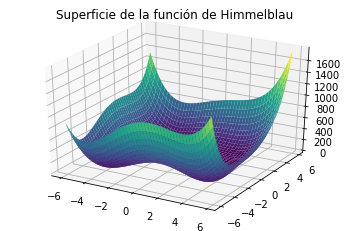

In [14]:
# Generamos valores para Y y X.
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y -11)**2 + (X + Y**2 -7)**2


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función de Himmelblau');

/home/milo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  """


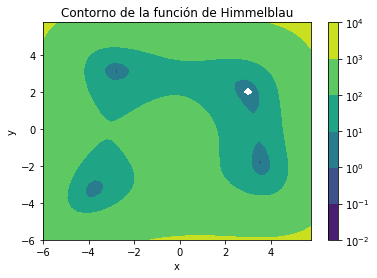

In [15]:
# Graficamos la gráfica de contorno de la función de la esfera 
from matplotlib import ticker, cm

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z,locator=ticker.LogLocator())
fig.colorbar(cp)
ax.set_title('Contorno de la función de Himmelblau')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [16]:
def himmelblau(X):
    return (X[0]**2 + X[1] -11)**2 + (X[0] + X[1]**2 -7)**2

def gradiente_himmelblau(X):
    dx = 4 * X[0] * (X[0]**2 + X[1] - 11) + 2 * (X[0] + X[1]**2 - 7)
    dy = 2 * (X[0]**2 + X[1] - 11) + 4 * X[1] * (X[0] + X[1]**2 - 7)
    return np.array([dx,dy])

In [17]:
# Definimos los parámetros iniciales
ε_himm = 0.000001
α_init_himm = 0.000002
c_himm = 0.5
ρ_himm = 0.5

xk_himm = [-3,3]
xk_anterior_himm  = [0,0]

descenso_gradiente(himmelblau,gradiente_himmelblau,ε_himm,α_init_himm,c_himm,ρ_himm,xk_himm,xk_anterior_himm)

Iteración 0
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Iteración 24
Iteración 25
Iteración 26
Iteración 27
Iteración 28
Iteración 29
Iteración 30
Iteración 31
Iteración 32
Iteración 33
Iteración 34
Iteración 35
Iteración 36
Iteración 37
Iteración 38
Iteración 39
Iteración 40
Iteración 41
Iteración 42
Iteración 43
Iteración 44
Iteración 45
Iteración 46
Iteración 47
Iteración 48
Iteración 49
Iteración 50
Iteración 51
Iteración 52
Iteración 53
Iteración 54
Iteración 55
Iteración 56
Iteración 57
Iteración 58
Iteración 59
Iteración 60
Iteración 61
Iteración 62
Iteración 63
Iteración 64
Iteración 65
Iteración 66
Iteración 67
Iteración 68
Iteración 69
Iteración 70
Iteración 71
Iteración 72
Iteración 73
Iteración 74
Iteración 75
Iteración 76
Iteración

Iteración 1384
Iteración 1385
Iteración 1386
Iteración 1387
Iteración 1388
Iteración 1389
Iteración 1390
Iteración 1391
Iteración 1392
Iteración 1393
Iteración 1394
Iteración 1395
Iteración 1396
Iteración 1397
Iteración 1398
Iteración 1399
Iteración 1400
Iteración 1401
Iteración 1402
Iteración 1403
Iteración 1404
Iteración 1405
Iteración 1406
Iteración 1407
Iteración 1408
Iteración 1409
Iteración 1410
Iteración 1411
Iteración 1412
Iteración 1413
Iteración 1414
Iteración 1415
Iteración 1416
Iteración 1417
Iteración 1418
Iteración 1419
Iteración 1420
Iteración 1421
Iteración 1422
Iteración 1423
Iteración 1424
Iteración 1425
Iteración 1426
Iteración 1427
Iteración 1428
Iteración 1429
Iteración 1430
Iteración 1431
Iteración 1432
Iteración 1433
Iteración 1434
Iteración 1435
Iteración 1436
Iteración 1437
Iteración 1438
Iteración 1439
Iteración 1440
Iteración 1441
Iteración 1442
Iteración 1443
Iteración 1444
Iteración 1445
Iteración 1446
Iteración 1447
Iteración 1448
Iteración 1449
Iteración 

Iteración 3683
Iteración 3684
Iteración 3685
Iteración 3686
Iteración 3687
Iteración 3688
Iteración 3689
Iteración 3690
Iteración 3691
Iteración 3692
Iteración 3693
Iteración 3694
Iteración 3695
Iteración 3696
Iteración 3697
Iteración 3698
Iteración 3699
Iteración 3700
Iteración 3701
Iteración 3702
Iteración 3703
Iteración 3704
Iteración 3705
Iteración 3706
Iteración 3707
Iteración 3708
Iteración 3709
Iteración 3710
Iteración 3711
Iteración 3712
Iteración 3713
Iteración 3714
Iteración 3715
Iteración 3716
Iteración 3717
Iteración 3718
Iteración 3719
Iteración 3720
Iteración 3721
Iteración 3722
Iteración 3723
Iteración 3724
Iteración 3725
Iteración 3726
Iteración 3727
Iteración 3728
Iteración 3729
Iteración 3730
Iteración 3731
Iteración 3732
Iteración 3733
Iteración 3734
Iteración 3735
Iteración 3736
Iteración 3737
Iteración 3738
Iteración 3739
Iteración 3740
Iteración 3741
Iteración 3742
Iteración 3743
Iteración 3744
Iteración 3745
Iteración 3746
Iteración 3747
Iteración 3748
Iteración 

Iteración 6015
Iteración 6016
Iteración 6017
Iteración 6018
Iteración 6019
Iteración 6020
Iteración 6021
Iteración 6022
Iteración 6023
Iteración 6024
Iteración 6025
Iteración 6026
Iteración 6027
Iteración 6028
Iteración 6029
Iteración 6030
Iteración 6031
Iteración 6032
Iteración 6033
Iteración 6034
Iteración 6035
Iteración 6036
Iteración 6037
Iteración 6038
Iteración 6039
Iteración 6040
Iteración 6041
Iteración 6042
Iteración 6043
Iteración 6044
Iteración 6045
Iteración 6046
Iteración 6047
Iteración 6048
Iteración 6049
Iteración 6050
Iteración 6051
Iteración 6052
Iteración 6053
Iteración 6054
Iteración 6055
Iteración 6056
Iteración 6057
Iteración 6058
Iteración 6059
Iteración 6060
Iteración 6061
Iteración 6062
Iteración 6063
Iteración 6064
Iteración 6065
Iteración 6066
Iteración 6067
Iteración 6068
Iteración 6069
Iteración 6070
Iteración 6071
Iteración 6072
Iteración 6073
Iteración 6074
Iteración 6075
Iteración 6076
Iteración 6077
Iteración 6078
Iteración 6079
Iteración 6080
Iteración 

Iteración 8414
Iteración 8415
Iteración 8416
Iteración 8417
Iteración 8418
Iteración 8419
Iteración 8420
Iteración 8421
Iteración 8422
Iteración 8423
Iteración 8424
Iteración 8425
Iteración 8426
Iteración 8427
Iteración 8428
Iteración 8429
Iteración 8430
Iteración 8431
Iteración 8432
Iteración 8433
Iteración 8434
Iteración 8435
Iteración 8436
Iteración 8437
Iteración 8438
Iteración 8439
Iteración 8440
Iteración 8441
Iteración 8442
Iteración 8443
Iteración 8444
Iteración 8445
Iteración 8446
Iteración 8447
Iteración 8448
Iteración 8449
Iteración 8450
Iteración 8451
Iteración 8452
Iteración 8453
Iteración 8454
Iteración 8455
Iteración 8456
Iteración 8457
Iteración 8458
Iteración 8459
Iteración 8460
Iteración 8461
Iteración 8462
Iteración 8463
Iteración 8464
Iteración 8465
Iteración 8466
Iteración 8467
Iteración 8468
Iteración 8469
Iteración 8470
Iteración 8471
Iteración 8472
Iteración 8473
Iteración 8474
Iteración 8475
Iteración 8476
Iteración 8477
Iteración 8478
Iteración 8479
Iteración 

Iteración 10727
Iteración 10728
Iteración 10729
Iteración 10730
Iteración 10731
Iteración 10732
Iteración 10733
Iteración 10734
Iteración 10735
Iteración 10736
Iteración 10737
Iteración 10738
Iteración 10739
Iteración 10740
Iteración 10741
Iteración 10742
Iteración 10743
Iteración 10744
Iteración 10745
Iteración 10746
Iteración 10747
Iteración 10748
Iteración 10749
Iteración 10750
Iteración 10751
Iteración 10752
Iteración 10753
Iteración 10754
Iteración 10755
Iteración 10756
Iteración 10757
Iteración 10758
Iteración 10759
Iteración 10760
Iteración 10761
Iteración 10762
Iteración 10763
Iteración 10764
Iteración 10765
Iteración 10766
Iteración 10767
Iteración 10768
Iteración 10769
Iteración 10770
Iteración 10771
Iteración 10772
Iteración 10773
Iteración 10774
Iteración 10775
Iteración 10776
Iteración 10777
Iteración 10778
Iteración 10779
Iteración 10780
Iteración 10781
Iteración 10782
Iteración 10783
Iteración 10784
Iteración 10785
Iteración 10786
Iteración 10787
Iteración 10788
Iteració

Iteración 12894
Iteración 12895
Iteración 12896
Iteración 12897
Iteración 12898
Iteración 12899
Iteración 12900
Iteración 12901
Iteración 12902
Iteración 12903
Iteración 12904
Iteración 12905
Iteración 12906
Iteración 12907
Iteración 12908
Iteración 12909
Iteración 12910
Iteración 12911
Iteración 12912
Iteración 12913
Iteración 12914
Iteración 12915
Iteración 12916
Iteración 12917
Iteración 12918
Iteración 12919
Iteración 12920
Iteración 12921
Iteración 12922
Iteración 12923
Iteración 12924
Iteración 12925
Iteración 12926
Iteración 12927
Iteración 12928
Iteración 12929
Iteración 12930
Iteración 12931
Iteración 12932
Iteración 12933
Iteración 12934
Iteración 12935
Iteración 12936
Iteración 12937
Iteración 12938
Iteración 12939
Iteración 12940
Iteración 12941
Iteración 12942
Iteración 12943
Iteración 12944
Iteración 12945
Iteración 12946
Iteración 12947
Iteración 12948
Iteración 12949
Iteración 12950
Iteración 12951
Iteración 12952
Iteración 12953
Iteración 12954
Iteración 12955
Iteració

Iteración 15343
Iteración 15344
Iteración 15345
Iteración 15346
Iteración 15347
Iteración 15348
Iteración 15349
Iteración 15350
Iteración 15351
Iteración 15352
Iteración 15353
Iteración 15354
Iteración 15355
Iteración 15356
Iteración 15357
Iteración 15358
Iteración 15359
Iteración 15360
Iteración 15361
Iteración 15362
Iteración 15363
Iteración 15364
Iteración 15365
Iteración 15366
Iteración 15367
Iteración 15368
Iteración 15369
Iteración 15370
Iteración 15371
Iteración 15372
Iteración 15373
Iteración 15374
Iteración 15375
Iteración 15376
Iteración 15377
Iteración 15378
Iteración 15379
Iteración 15380
Iteración 15381
Iteración 15382
Iteración 15383
Iteración 15384
Iteración 15385
Iteración 15386
Iteración 15387
Iteración 15388
Iteración 15389
Iteración 15390
Iteración 15391
Iteración 15392
Iteración 15393
Iteración 15394
Iteración 15395
Iteración 15396
Iteración 15397
Iteración 15398
Iteración 15399
Iteración 15400
Iteración 15401
Iteración 15402
Iteración 15403
Iteración 15404
Iteració

Iteración 17650
Iteración 17651
Iteración 17652
Iteración 17653
Iteración 17654
Iteración 17655
Iteración 17656
Iteración 17657
Iteración 17658
Iteración 17659
Iteración 17660
Iteración 17661
Iteración 17662
Iteración 17663
Iteración 17664
Iteración 17665
Iteración 17666
Iteración 17667
Iteración 17668
Iteración 17669
Iteración 17670
Iteración 17671
Iteración 17672
Iteración 17673
Iteración 17674
Iteración 17675
Iteración 17676
Iteración 17677
Iteración 17678
Iteración 17679
Iteración 17680
Iteración 17681
Iteración 17682
Iteración 17683
Iteración 17684
Iteración 17685
Iteración 17686
Iteración 17687
Iteración 17688
Iteración 17689
Iteración 17690
Iteración 17691
Iteración 17692
Iteración 17693
Iteración 17694
Iteración 17695
Iteración 17696
Iteración 17697
Iteración 17698
Iteración 17699
Iteración 17700
Iteración 17701
Iteración 17702
Iteración 17703
Iteración 17704
Iteración 17705
Iteración 17706
Iteración 17707
Iteración 17708
Iteración 17709
Iteración 17710
Iteración 17711
Iteració

Iteración 20031
Iteración 20032
Iteración 20033
Iteración 20034
Iteración 20035
Iteración 20036
Iteración 20037
Iteración 20038
Iteración 20039
Iteración 20040
Iteración 20041
Iteración 20042
Iteración 20043
Iteración 20044
Iteración 20045
Iteración 20046
Iteración 20047
Iteración 20048
Iteración 20049
Iteración 20050
Iteración 20051
Iteración 20052
Iteración 20053
Iteración 20054
Iteración 20055
Iteración 20056
Iteración 20057
Iteración 20058
Iteración 20059
Iteración 20060
Iteración 20061
Iteración 20062
Iteración 20063
Iteración 20064
Iteración 20065
Iteración 20066
Iteración 20067
Iteración 20068
Iteración 20069
Iteración 20070
Iteración 20071
Iteración 20072
Iteración 20073
Iteración 20074
Iteración 20075
Iteración 20076
Iteración 20077
Iteración 20078
Iteración 20079
Iteración 20080
Iteración 20081
Iteración 20082
Iteración 20083
Iteración 20084
Iteración 20085
Iteración 20086
Iteración 20087
Iteración 20088
Iteración 20089
Iteración 20090
Iteración 20091
Iteración 20092
Iteració

array([-2.81485868,  3.12773527])